<a href="https://colab.research.google.com/github/valeriafigueredo-data/modelos_descritivos/blob/main/6_trabalhofinal_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Modelos descritivos**


Professor: Matheus Soares de Lacerda

Sala: 01

**Alunos:**

* Arthur Wanderley Ferreira dos Santos
* André Felipe Bezerra de Souza Leão
* Manuela de Lacerda Bezerra Carvalho
* Valéria Cristina Andrade Rodrigues de Figueredo
* Thiago Wanderley Amorim

O objetivo do presente trabalho é realizar análises de clusters em um conjunto de dados do âmbito da saúde - tema: sono. Será gerado e analisado clusters dos pacientes com base em suas ocupações, duração do sono, qualidade do sono, nível de atividade física, nível de stress, índice de massa corporal (BMI category) e outros.

**FONTE DO DATASET**: https://www.kaggle.com/code/jillanisofttech/sleep-health-and-lifestyle-predication-with-94-ac/input?select=Sleep_health_and_lifestyle_dataset.csv

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, single, average, fcluster
from scipy.spatial.distance import squareform
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


# Tratamento de dados
*   Substituição dos valores nulos na coluna Sleep Disorder
*   Padronização do valor Normal Weight para Normal






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [ ]:
# Substituição dos valores nulos
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Sleep Apnea')
df['Sleep Disorder'].isnull().any()

False

# Análise exploratória

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,189
Female,185


In [ ]:
homens = len(df[df['Gender'] == 'Male'])
mulheres = len(df[df['Gender'] == 'Female'])

print(f"Sexo feminino compõe: {round((mulheres / len(df)) * 100, 2)}%")
print(f"Sexo masculino compõe: {round((homens / len(df)) * 100, 2)}%")

Sexo feminino compõe: 49.47%
Sexo masculino compõe: 50.53%


In [ ]:
df['Age'].describe()

,Age
count,374.000000
mean,42.184492
std,8.673133
min,27.000000
25%,35.250000
50%,43.000000
75%,50.000000
max,59.000000


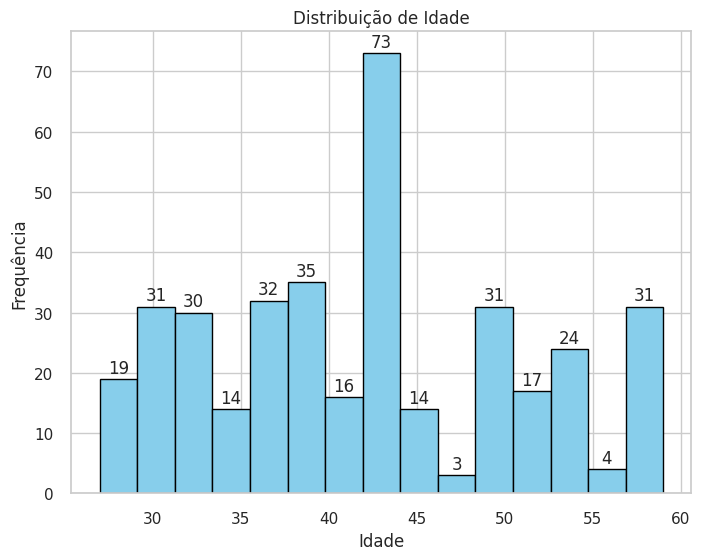

In [ ]:
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(df['Age'], bins=15, color='skyblue', edgecolor='black')

# Adicionar rótulos de contagem
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 1, f'{int(count)}', ha='center')

plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
mulheres_df = df[df['Gender'] == 'Female']
homens_df = df[df['Gender'] == 'Male']
print('Mulheres')
print(mulheres_df['Age'].describe())
print('\nHomens')
print(homens_df['Age'].describe())

Mulheres
count    185.000000
mean      47.405405
std        8.093407
min       29.000000
25%       39.000000
50%       50.000000
75%       53.000000
max       59.000000
Name: Age, dtype: float64

Homens
count    189.000000
mean      37.074074
std        5.662006
min       27.000000
25%       32.000000
50%       38.000000
75%       43.000000
max       49.000000
Name: Age, dtype: float64


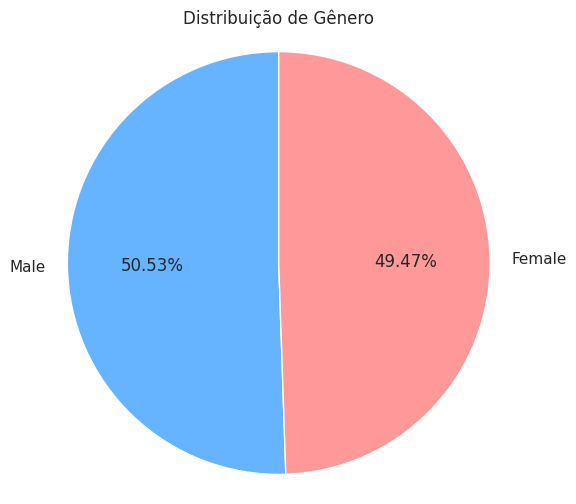

In [ ]:
# Supondo que você tenha um DataFrame chamado df com uma coluna 'Gender'
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribuição de Gênero')
plt.axis('equal')
plt.show()

In [ ]:
homens_df['Age'].describe()

,Age
count,189.000000
mean,37.074074
std,5.662006
min,27.000000
25%,32.000000
50%,38.000000
75%,43.000000
max,49.000000


In [ ]:
print(f"Existem {len(df['Occupation'].unique())} profissões nas amostras")

Existem 11 profissões nas amostras


In [ ]:
df_occupation_by_sex = df.pivot_table(index='Occupation', columns='Gender', aggfunc='size', fill_value=0).reset_index()

df_occupation_by_sex.columns = ['Occupation', 'Female', 'Male']

# Criando a coluna Total
df_occupation_by_sex['Total'] = df_occupation_by_sex['Female'] + df_occupation_by_sex['Male']

# Reordenando as colunas
df_occupation_by_sex = df_occupation_by_sex[['Occupation', 'Total', 'Male', 'Female']]

df_occupation_by_sex

,Occupation,Total,Male,Female
0,Accountant,37,1,36
1,Doctor,71,69,2
2,Engineer,63,31,32
3,Lawyer,47,45,2
4,Manager,1,0,1
5,Nurse,73,0,73
6,Sales Representative,2,2,0
7,Salesperson,32,32,0
8,Scientist,4,0,4
9,Software Engineer,4,4,0


In [ ]:
most_common_total = df_occupation_by_sex['Total'].max()
total = df_occupation_by_sex['Total'].sum()

# Para mulheres
most_common_occupation_result = df_occupation_by_sex[df_occupation_by_sex['Total'] == most_common_total]
most_common_occupation = most_common_occupation_result['Occupation'].values[0]
most_common_total = most_common_occupation_result['Total'].values[0]
most_common_share = round((most_common_total / total) * 100, 2)

# Para homens
most_common_male_occupation_total = df_occupation_by_sex['Male'].max()
total_most_common_male_occupation = df_occupation_by_sex['Male'].sum()

most_common_male_occupation_result = df_occupation_by_sex[df_occupation_by_sex['Male'] == most_common_male_occupation_total]
most_common_male_occupation = most_common_male_occupation_result['Occupation'].values[0]
most_common_male_total = most_common_male_occupation_result['Male'].values[0]
most_common_male_occupation_share = round((most_common_male_total / total) * 100, 2)

print(f"""Profissão mais comum:
Entre as mulheres: {most_common_occupation} com total de: {most_common_total} = {most_common_share}%
Entre os homens: {most_common_male_occupation} com total de: {most_common_male_total} = {most_common_male_occupation_share}%
""")

Profissão mais comum:
Entre as mulheres: Nurse com total de: 73 = 19.52%
Entre os homens: Doctor com total de: 69 = 18.45%



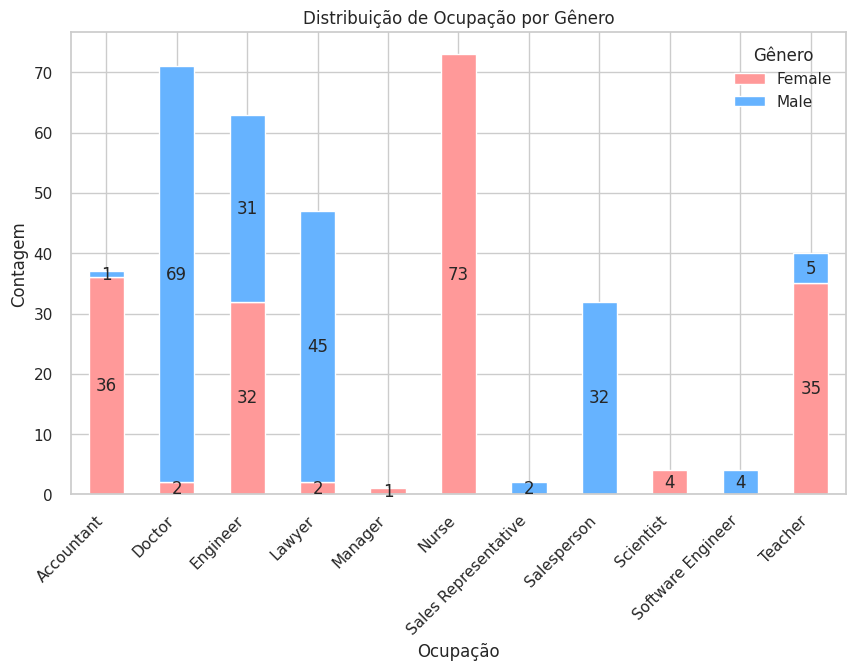

In [ ]:
occupation_gender = df.groupby(['Occupation', 'Gender']).size().unstack()

ax = occupation_gender.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# Adicionar rótulos de contagem nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width / 2, y + height / 2, f'{int(height)}', ha='center', va='center')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Ajuste para labels horizontais
plt.title('Distribuição de Ocupação por Gênero')
plt.xlabel('Ocupação')
plt.ylabel('Contagem')
plt.legend(title='Gênero')
plt.show()

In [ ]:
df['Sleep Duration'].describe()

,Sleep Duration
count,374.000000
mean,7.132086
std,0.795657
min,5.800000
25%,6.400000
50%,7.200000
75%,7.800000
max,8.500000


In [ ]:
min_duration = df['Sleep Duration'].min()
worse_duration = df[df['Sleep Duration'] == min_duration]
worse_duration

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea


In [ ]:
max_duration = df['Sleep Duration'].max()
best_duration = df[df['Sleep Duration'] == max_duration]
best_duration.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
298,299,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,Sleep Apnea
299,300,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,Sleep Apnea
300,301,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,Sleep Apnea
301,302,Female,51,Engineer,8.5,9,30,3,Normal,125/80,65,5000,Sleep Apnea
316,317,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,Sleep Apnea


In [ ]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [ ]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [ ]:
obeses = df[df['BMI Category'] == 'Obese']
acima_do_peso = df[df['BMI Category'] == 'Overweight']
normal = df[(df['BMI Category'] == 'Normal') | (df['BMI Category'] == 'Normal Weight')]

print(f"""
Pessoas com peso normal: {len(normal)} = {round((len(normal) / len(df)) * 100, 2)}%
Pessoas acima do peso: {len(acima_do_peso)} = {round((len(acima_do_peso) / len(df)) * 100, 2)}%
Pessoas obesas: {len(obeses)} = {round((len(obeses) / len(df)) * 100, 2)}%""")


Pessoas com peso normal: 216 = 57.75%
Pessoas acima do peso: 148 = 39.57%
Pessoas obesas: 10 = 2.67%


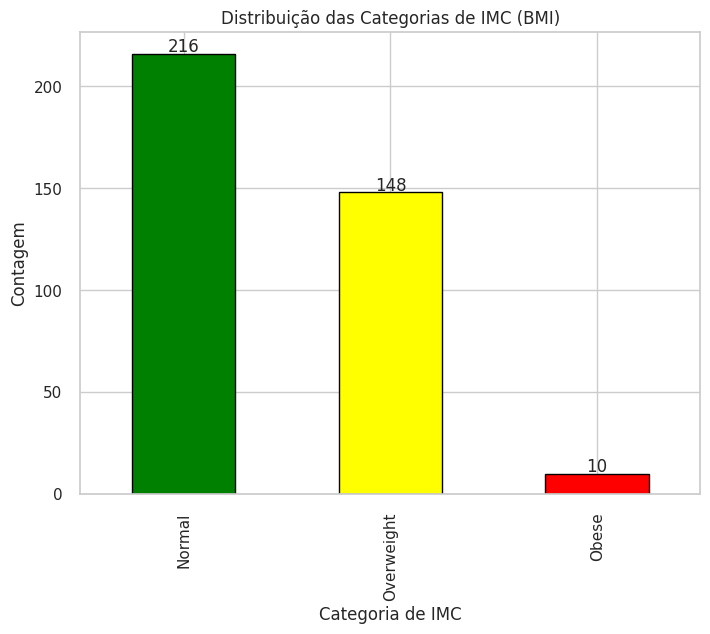

In [ ]:
# Criar uma cópia do DataFrame apenas com a coluna 'BMI Category'
df_bmi_category = df[['BMI Category']].copy()

# Contagem de cada categoria
bmi_category_counts = df_bmi_category['BMI Category'].value_counts().reindex(['Normal', 'Overweight', 'Obese'])

# Definindo as cores para o gráfico: do verde (normal) ao vermelho (obeso)
colors = ['green', 'yellow', 'red']

# Criando o gráfico
ax = bmi_category_counts.plot(kind='bar', figsize=(8, 6), color=colors, edgecolor='black')

# Adicionar rótulos de contagem nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}', ha='center')

plt.title('Distribuição das Categorias de IMC (BMI)')
plt.xlabel('Categoria de IMC')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [ ]:
# Pessoas que dormem menos de 6 horas e 40 minutos por dia e a relação com o peso

worse_sleep_quality = df[df['Sleep Duration'] <= 6.4]
total_worse_sleep_quality = len(worse_sleep_quality)

bad_sleep_normal = df[(df['Sleep Duration'] <= 6.4) & (df['BMI Category'] == 'Normal')]
total_normal = df[df['BMI Category'] == 'Normal']

bad_sleep_obeses = df[(df['Sleep Duration'] <= 6.4) & (df['BMI Category'] == 'Obese')]
total_obesos = df[df['BMI Category'] == 'Obese']

bad_sleep_acima_do_peso = df[(df['Sleep Duration'] <= 6.4) & (df['BMI Category'] == 'Overweight')]
total_acima_do_peso = df[df['BMI Category'] == 'Overweight']

print(f"""Pessoas que dormem menos de 6 horas e 40 minutos por dia:
Com peso normal: {len(bad_sleep_normal)} de {len(total_normal)} = {round((len(bad_sleep_normal) / len(total_normal) * 100), 2)}%
Acima do peso: {len(bad_sleep_acima_do_peso)} de {len(total_acima_do_peso)} = {round((len(bad_sleep_acima_do_peso) / len(total_acima_do_peso) * 100), 2)}%
Obesas: {len(bad_sleep_obeses)} de {len(total_obesos)} = {round((len(bad_sleep_obeses) / len(total_obesos) * 100), 2)}%
""")

Pessoas que dormem menos de 6 horas e 40 minutos por dia:
Com peso normal: 35 de 216 = 16.2%
Acima do peso: 57 de 148 = 38.51%
Obesas: 4 de 10 = 40.0%



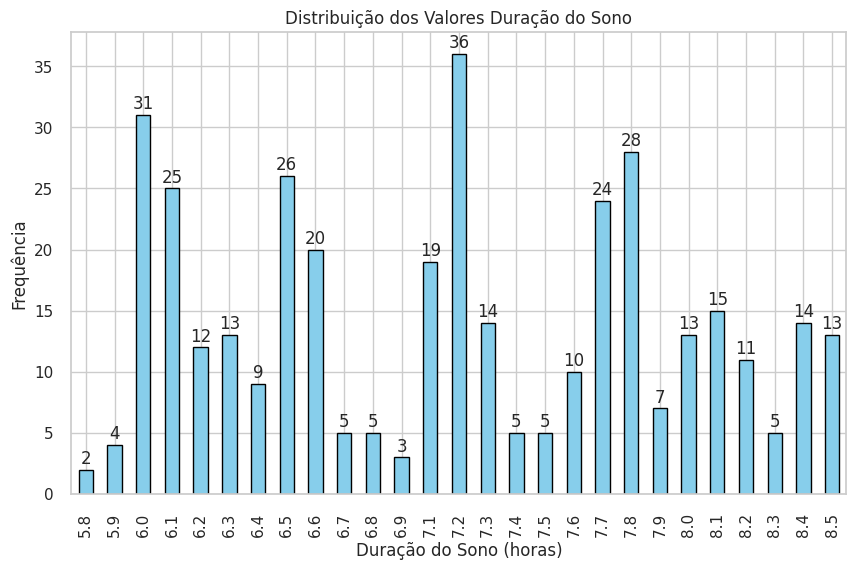

In [ ]:
# Criar uma cópia do DataFrame original apenas com a coluna 'Sleep Duration'
df_sleep_duration = df[['Sleep Duration']].copy()

# Contar as ocorrências de cada valor único de 'Sleep Duration'
sleep_duration_counts = df_sleep_duration['Sleep Duration'].value_counts().sort_index()

# Criando o gráfico de barras para todos os valores únicos
plt.figure(figsize=(10, 6))
ax = sleep_duration_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionar rótulos de contagem nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}', ha='center')

plt.title('Distribuição dos Valores Duração do Sono')
plt.xlabel('Duração do Sono (horas)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
# Pessoas que dormem mais de 8 horas por dia e a relação com o peso

best_sleep_quality = df[df['Sleep Duration'] >= 8]
total_best_sleep_quality = len(best_sleep_quality)

good_sleep_normal = df[(df['Sleep Duration'] >= 8) & (df['BMI Category'] == 'Normal')]
normal = df[df['BMI Category'] == 'Normal']

good_sleep_obeses = df[(df['Sleep Duration'] >= 8) & (df['BMI Category'] == 'Obese')]
obesos = df[df['BMI Category'] == 'Obese']

good_sleep_acima_do_peso = df[(df['Sleep Duration'] >= 8) & (df['BMI Category'] == 'Overweight')]
acima_do_peso = df[df['BMI Category'] == 'Overweight']

print(f"""Pessoas que dormem pelo menos 8 horas por dia:
Com peso normal: {len(good_sleep_normal)} de {len(normal)} = {round((len(good_sleep_normal) / len(normal) * 100), 2)}%
Acima do peso: {len(good_sleep_acima_do_peso)} de {len(acima_do_peso)} = {round((len(good_sleep_acima_do_peso) / len(acima_do_peso) * 100), 2)}%
Obesas: {len(good_sleep_obeses)} de {len(obesos)} = {round((len(good_sleep_obeses) / len(obesos) * 100), 2)}%
""")

Pessoas que dormem pelo menos 8 horas por dia:
Com peso normal: 36 de 216 = 16.67%
Acima do peso: 33 de 148 = 22.3%
Obesas: 2 de 10 = 20.0%



In [ ]:
# Pessoas que dormem menos de 6 horas e 40 minutos por dia e a relação com a idade
worse_sleep_quality['Age'].describe()

,Age
count,96.000000
mean,39.947917
std,8.551232
min,27.000000
25%,32.000000
50%,44.000000
75%,49.000000
max,51.000000


In [ ]:
# Pessoas que dormem mais de 8 horas por dia e a relação com a idade
best_sleep_quality['Age'].describe()

,Age
count,71.000000
mean,54.816901
std,4.001106
min,39.000000
25%,53.000000
50%,54.000000
75%,58.000000
max,59.000000


In [ ]:
# Indicadores da qualidade do sono (4 indica a pior qualidade e 9 a melhor)
sorted(df['Quality of Sleep'].unique())

[4, 5, 6, 7, 8, 9]

In [ ]:
df['Quality of Sleep'].value_counts()

,count
Quality of Sleep,
8,109
6,105
7,77
9,71
5,7
4,5


In [ ]:
worse_quality = df[(df['Quality of Sleep'] == 4) | (df['Quality of Sleep'] == 5)]
worse_quality.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
16,17,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Sleep Apnea
18,19,Female,29,Nurse,6.5,5,40,7,Normal,132/87,80,4000,Insomnia


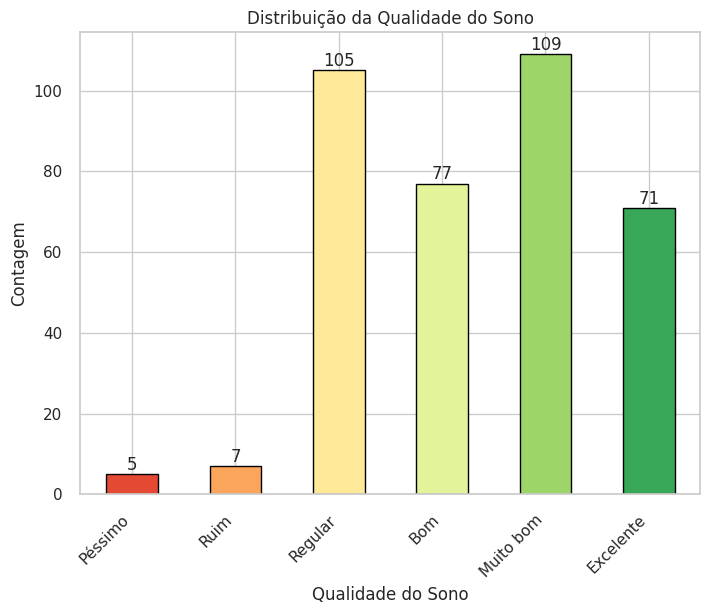

In [ ]:
# Criar uma cópia do DataFrame original para o gráfico de "Quality of Sleep"
df_qlty_sleep = df[['Quality of Sleep']].copy()

# Mapeamento dos valores para rótulos
quality_mapping = {
    9: 'Excelente',
    8: 'Muito bom',
    7: 'Bom',
    6: 'Regular',
    5: 'Ruim',
    4: 'Péssimo'
}

# Mapeando os valores na cópia do DataFrame
df_qlty_sleep['Quality of Sleep Labeled'] = df_qlty_sleep['Quality of Sleep'].map(quality_mapping)

# Contagem de cada categoria após mapeamento
quality_counts = df_qlty_sleep['Quality of Sleep Labeled'].value_counts().reindex(['Péssimo', 'Ruim', 'Regular', 'Bom', 'Muito bom', 'Excelente'])

# Definindo as cores para o gráfico
colors = sns.color_palette("RdYlGn", n_colors=6)  # Escala de cores do vermelho ao verde

# Criando o gráfico
ax = quality_counts.plot(kind='bar', figsize=(8, 6), color=colors, edgecolor='black')

# Adicionar rótulos de contagem nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}', ha='center')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Ajuste para labels horizontais

plt.title('Distribuição da Qualidade do Sono')
plt.xlabel('Qualidade do Sono')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [ ]:
df['Physical Activity Level'].describe()

,Physical Activity Level
count,374.000000
mean,59.171123
std,20.830804
min,30.000000
25%,45.000000
50%,60.000000
75%,75.000000
max,90.000000


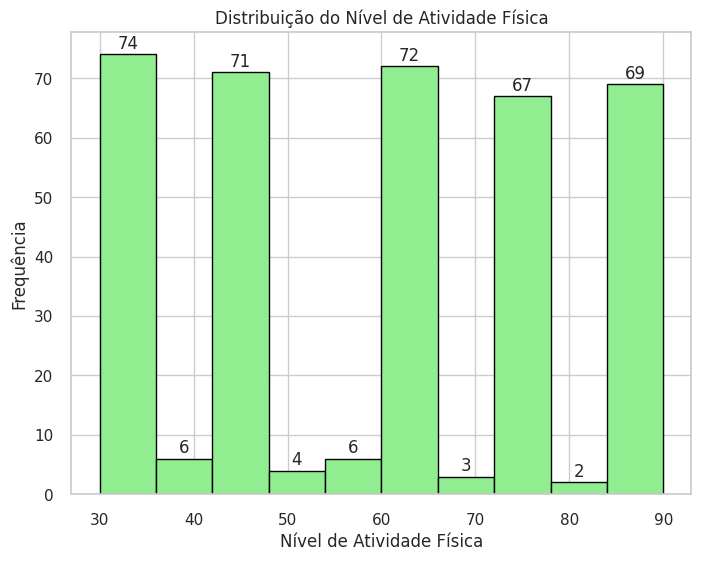

In [ ]:
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(df['Physical Activity Level'], bins=10, color='lightgreen', edgecolor='black')

# Adicionar rótulos de contagem
for count, patch in zip(counts, patches):
    height = patch.get_height()
    plt.text(patch.get_x() + patch.get_width() / 2, height + 1, f'{int(count)}', ha='center')

plt.title('Distribuição do Nível de Atividade Física')
plt.xlabel('Nível de Atividade Física')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

In [ ]:
best_quality = df[(df['Quality of Sleep'] == 8) | (df['Quality of Sleep'] == 9)]
best_quality.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
32,33,Female,31,Nurse,7.9,8,75,4,Normal,117/76,69,6800,Sleep Apnea
50,51,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70,8000,Sleep Apnea
51,52,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70,8000,Sleep Apnea
66,67,Male,32,Accountant,7.2,8,50,6,Normal,118/76,68,7000,Sleep Apnea
84,85,Male,35,Software Engineer,7.5,8,60,5,Normal,120/80,70,8000,Sleep Apnea


In [ ]:
print(f"""Qualidade do sono:
{len(worse_quality)} pessoas que possuem baixa qualidade (entre 4 a 5): {round((len(worse_quality) / len(df) * 100), 2)}%
{len(best_quality)} pessoas que possuem boa qualidade (entre 7 a 8): {round((len(best_quality) / len(df) * 100), 2)}%
""")

Qualidade do sono:
12 pessoas que possuem baixa qualidade (entre 4 a 5): 3.21%
180 pessoas que possuem boa qualidade (entre 7 a 8): 48.13%



In [ ]:
# Indicadores do nível de stress (3 ou 4 indica indivíduos menos afetados e 7 ou 8 os mais afetados)
sorted(df['Stress Level'].unique())

[3, 4, 5, 6, 7, 8]

In [ ]:
df['Stress Level'].describe()

,Stress Level
count,374.000000
mean,5.385027
std,1.774526
min,3.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,8.000000


In [ ]:
low_stress_level_df = df[(df['Stress Level'] == 3) | (df['Stress Level'] == 4)]
low_stress_level_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
32,33,Female,31,Nurse,7.9,8,75,4,Normal,117/76,69,6800,Sleep Apnea
50,51,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70,8000,Sleep Apnea
51,52,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70,8000,Sleep Apnea
85,86,Female,35,Accountant,7.2,8,60,4,Normal,115/75,68,7000,Sleep Apnea
86,87,Male,35,Engineer,7.2,8,60,4,Normal,125/80,65,5000,Sleep Apnea


In [ ]:
high_stress_level_df = df[(df['Stress Level'] == 7) | (df['Stress Level'] == 8)]
high_stress_level_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia


In [ ]:
print(f"""Níveis de stress:
{len(low_stress_level_df)} pessoas com baixo nível (3 ou 4): {round((len(low_stress_level_df) / len(df) * 100), 2)}%
{len(high_stress_level_df)} pessoas com alto nível (7 ou 8): {round((len(high_stress_level_df) / len(df) * 100), 2)}%
""")

Níveis de stress:
141 pessoas com baixo nível (3 ou 4): 37.7%
120 pessoas com alto nível (7 ou 8): 32.09%



In [ ]:
# Relação de Alto nível de stress x Profissão
occupations_in_high_stress = high_stress_level_df['Occupation'].unique()

print(f"""Profissões afetadas pelo alto nível de stress: {len(occupations_in_high_stress)} de {len(df['Occupation'].unique())}""")
for o in occupations_in_high_stress:
  print(o)

Profissões afetadas pelo alto nível de stress: 9 de 11
Doctor
Sales Representative
Software Engineer
Teacher
Nurse
Scientist
Engineer
Salesperson
Accountant


In [ ]:
occupations_not_in_high_stress = df[~df['Occupation'].isin(high_stress_level_df['Occupation'])]
occupations = occupations_not_in_high_stress['Occupation'].unique()

print("Profissões não afetadas pelo alto nível de stress:")
for o in occupations:
  print(o)

Profissões não afetadas pelo alto nível de stress:
Lawyer
Manager


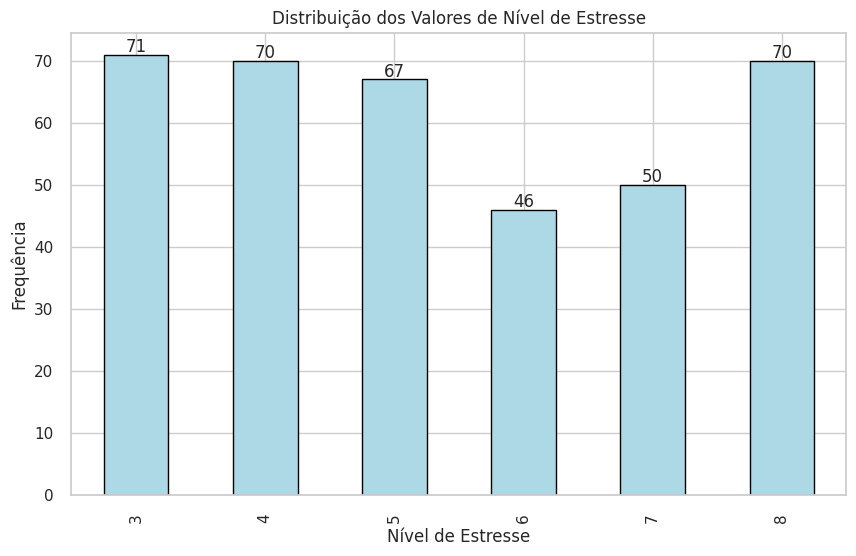

In [ ]:
# Criar uma cópia do DataFrame original apenas com a coluna 'Stress Level'
df_stress_level = df[['Stress Level']].copy()

# Contar as ocorrências de cada valor único de 'Stress Level'
stress_level_counts = df_stress_level['Stress Level'].value_counts().sort_index()

# Criando o gráfico de barras para todos os valores únicos
plt.figure(figsize=(10, 6))
ax = stress_level_counts.plot(kind='bar', color='lightblue', edgecolor='black')

# Adicionar rótulos de contagem nas barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{int(height)}', ha='center')

plt.title('Distribuição dos Valores de Nível de Estresse')
plt.xlabel('Nível de Estresse')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

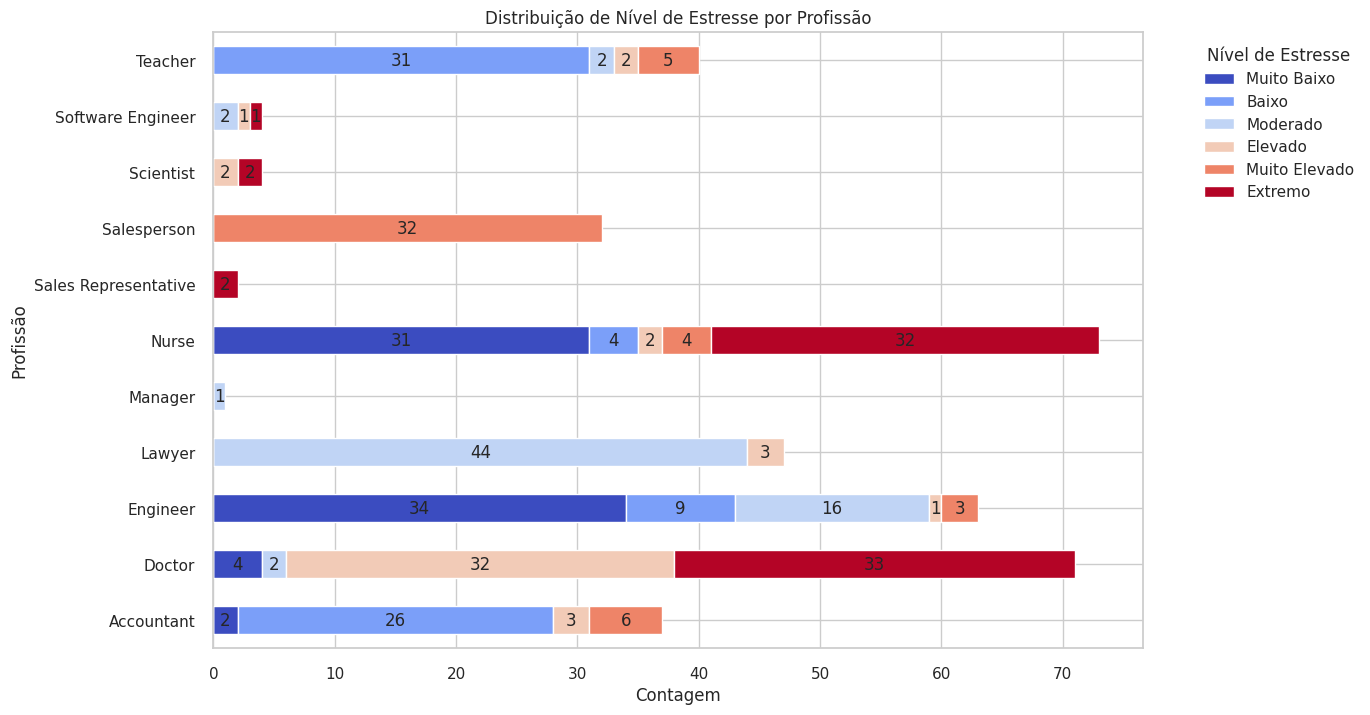

In [ ]:
from matplotlib.colors import ListedColormap

# Criar o mapeamento dos níveis de estresse para categorias
stress_mapping = {
    3: 'Muito Baixo',
    4: 'Baixo',
    5: 'Moderado',
    6: 'Elevado',
    7: 'Muito Elevado',
    8: 'Extremo'
}

# Aplicar o mapeamento ao DataFrame em uma nova coluna 'Stress Level Category'
df['Stress Level Category'] = df['Stress Level'].map(stress_mapping)

# Criar uma tabela cruzada (pivot) para contar as ocorrências de cada combinação de profissão e categoria de nível de estresse
stress_by_occupation = df.pivot_table(index='Occupation', columns='Stress Level Category', aggfunc='size', fill_value=0)

# Ajustar a ordem dos níveis de estresse para a legenda e no gráfico
ordered_columns = ['Muito Baixo', 'Baixo', 'Moderado', 'Elevado', 'Muito Elevado', 'Extremo']
stress_by_occupation = stress_by_occupation[ordered_columns]

# Gerar as cores a partir do colormap coolwarm
cmap = plt.get_cmap('coolwarm', 6)
colors = cmap(np.linspace(0, 1, 6))

# Criar o gráfico de barras empilhadas horizontal
ax = stress_by_occupation.plot(kind='barh', stacked=True, figsize=(12, 8), color=colors)

# Adicionar título e rótulos
plt.title('Distribuição de Nível de Estresse por Profissão')
plt.ylabel('Profissão')
plt.xlabel('Contagem')
plt.legend(title='Nível de Estresse', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Adicionar rótulos nas barras, mas somente quando a contagem for maior que 0
for bars in ax.containers:
    ax.bar_label(bars, labels=[f'{int(v)}' if v > 0 else '' for v in bars.datavalues], label_type='center')

plt.show()

In [ ]:
bmi_mapping = {
    'Normal': 1,
    'Overweight': 2,
    'Obese': 3
}

df['BMI Code'] = df['BMI Category'].map(bmi_mapping)

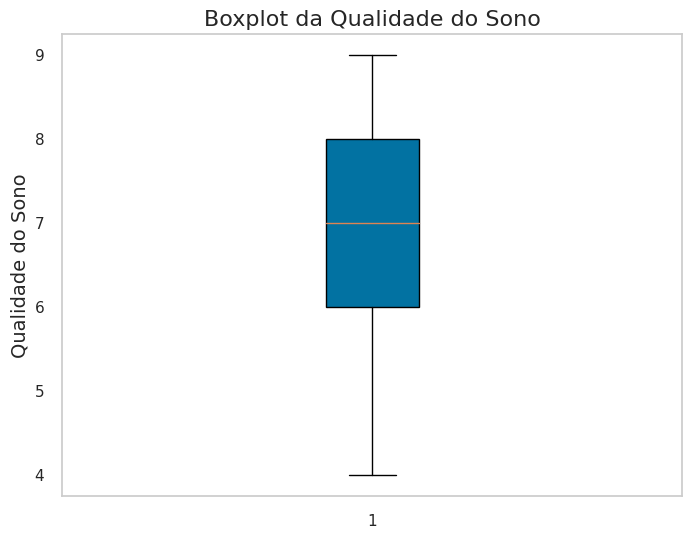

In [ ]:
plt.figure(figsize=(8, 6))
# Criar o boxplot
plt.boxplot(df['Quality of Sleep'], patch_artist=True)
plt.grid(False)
plt.title('Boxplot da Qualidade do Sono', fontsize=16)
plt.ylabel('Qualidade do Sono', fontsize=14)
plt.show()

# Correlações

In [ ]:
df_values = df.drop(columns=['Person ID', 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'])

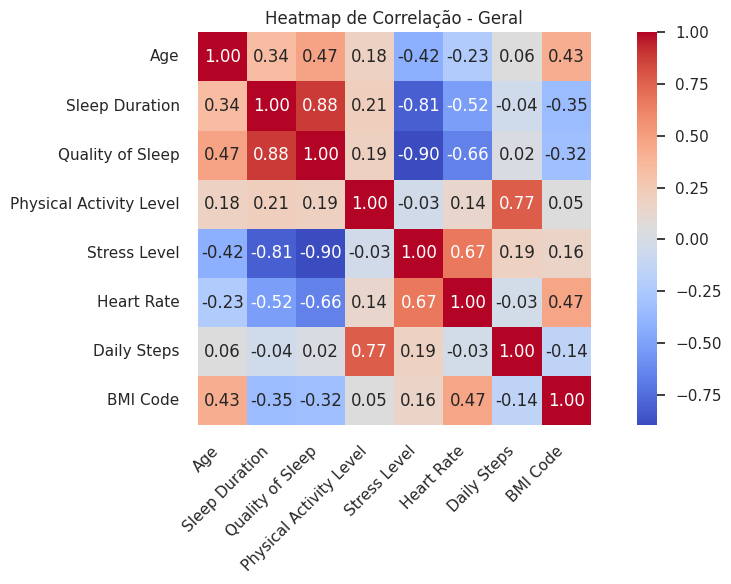

In [ ]:
df_corr = df_values.corr()

# Plotando o heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df_corr, fmt='.2f', square=True,
            linecolor='white', annot=True, cmap="coolwarm", ax=ax)

plt.title('Heatmap de Correlação - Geral')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Ajuste para labels horizontais
plt.tight_layout()
plt.show()

**bold text**
* A qualidade do sono é fortemente afetada pela duração do sono, ou seja, é necessário também ter a quantidades de horas adequada para o descanso;
*  O nível de stress elevado está relacionado de maneira muito forte com uma má qualidade do sono;
* Pessoas com frequência cardíaca elevada também apresentam a qualidade do sono afetada negativamente.

Classificação das correlações
* Muito Forte: Qualidade do Sono x Duração do Sono (0.88);
* Muito Forte: Qualidade do Sono x Nível de Stress (-0.90);
* Forte: Qualidade do Sono x Frequência cardíava (-0.66);
*   Muito Forte: Nível de Stress x Duração do Sono (-0.81);
*   Forte: Caminhadas diárias x Nível de Atividade Física (0.77);
*   Forte: Frequência Cardíaca x Nível de Stress (0.67);
*   Moderada: Duração do Sono x Frequência Cardíaca (-0.52)
*   Moderada: Código BMI x Idade(0.43);
*   Moderada: Código BMI x Frequência Cardíaca (0.47)



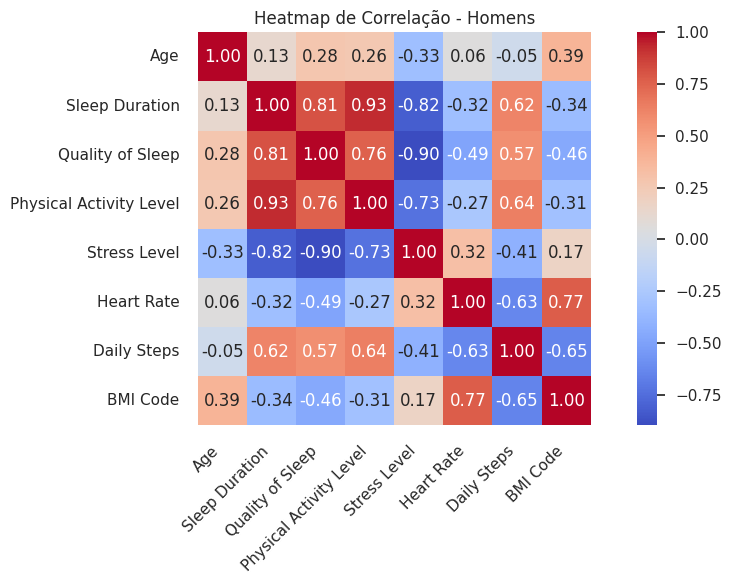

In [ ]:
df_homens = df[df['Gender'] == 'Male']
df_homens = df_homens.drop(columns=['Person ID', 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'])

df_corr = df_homens.corr()

# plotando o heatmap
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_corr, fmt='.2f', square=True,
linecolor='white', annot=True, cmap="coolwarm")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Ajuste para labels horizontais
plt.title('Heatmap de Correlação - Homens')
plt.tight_layout()

plt.show()

* Ao segmentar o dataset por gênero, percebemos fortes diferenças nos indicadores de correlação em relação ao geral, além de obtermos correlações muito fortes onde antes eram classificadas como muito fracas ou fracas;
* O nível de Atividade física passou a afetar diretamente e de maneira forte a qualidade do sono;
* A atividade física passou a influenciar expressivamente a duração do sono e o nível de stress, dadas como correlações fracas e muito fracas respectivamente;
* As caminhadas diárias passaram a influenciar consideravelmente nas correlações entre a duração do sono, frequência cardíaca e no peso (BMI Code);
* O peso passou a ter forte influência na frequência cardíaca



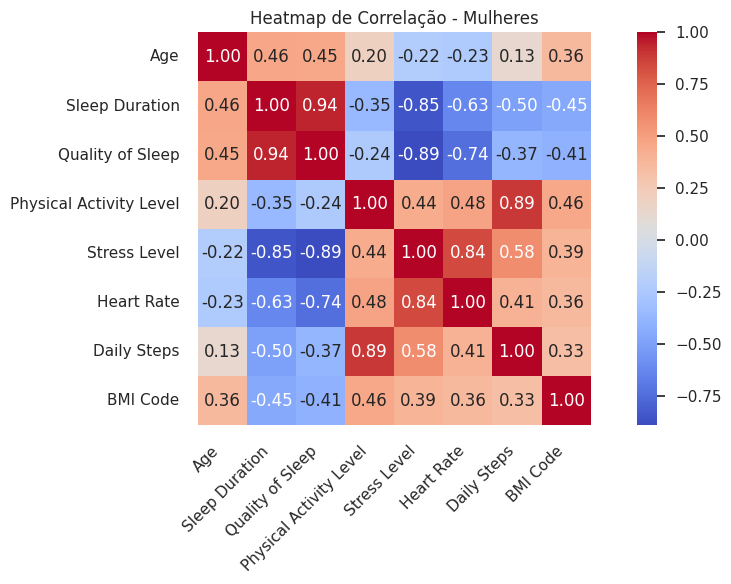

In [ ]:
df_mulheres = df[df['Gender'] == 'Female']
df_mulheres = df_mulheres.drop(columns=['Person ID', 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'])

df_corr = df_mulheres.corr()

# plotando o heatmap
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_corr, fmt='.2f', square=True,
linecolor='white', annot=True, cmap="coolwarm")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Ajuste para labels horizontais
plt.title('Heatmap de Correlação - Mulheres')
plt.tight_layout()

plt.show()

Diferanças entre Homens e Mulheres:
*   A frequência cardíaca nos homens afeta de maneira moderada a qualidade do sono, enquanto que nas mulheres afeta de maneira forte;
* A frequência cardíaca nos homens afeta de maneira fraca a duração do sono, enquanto que nas mulheres afeta de maneira forte;
* A atividade física exerce influência muito forte na duração do sono nos homems enquanto nas mulheres além de possuir uma correlação fraca, o fator é negativo, ou seja, quanto maior o desgaste físico, pior é a duração do sono;
* A atividade física reduz de maneira forte o nível de stress nos homens enquanto nas mulheres essa correlação é fraca e de fator positivo;
* O peso dos homens afeta a frequência cardíaca de maneira forte enquanto que nas mulheres afeta de maneira fraca;




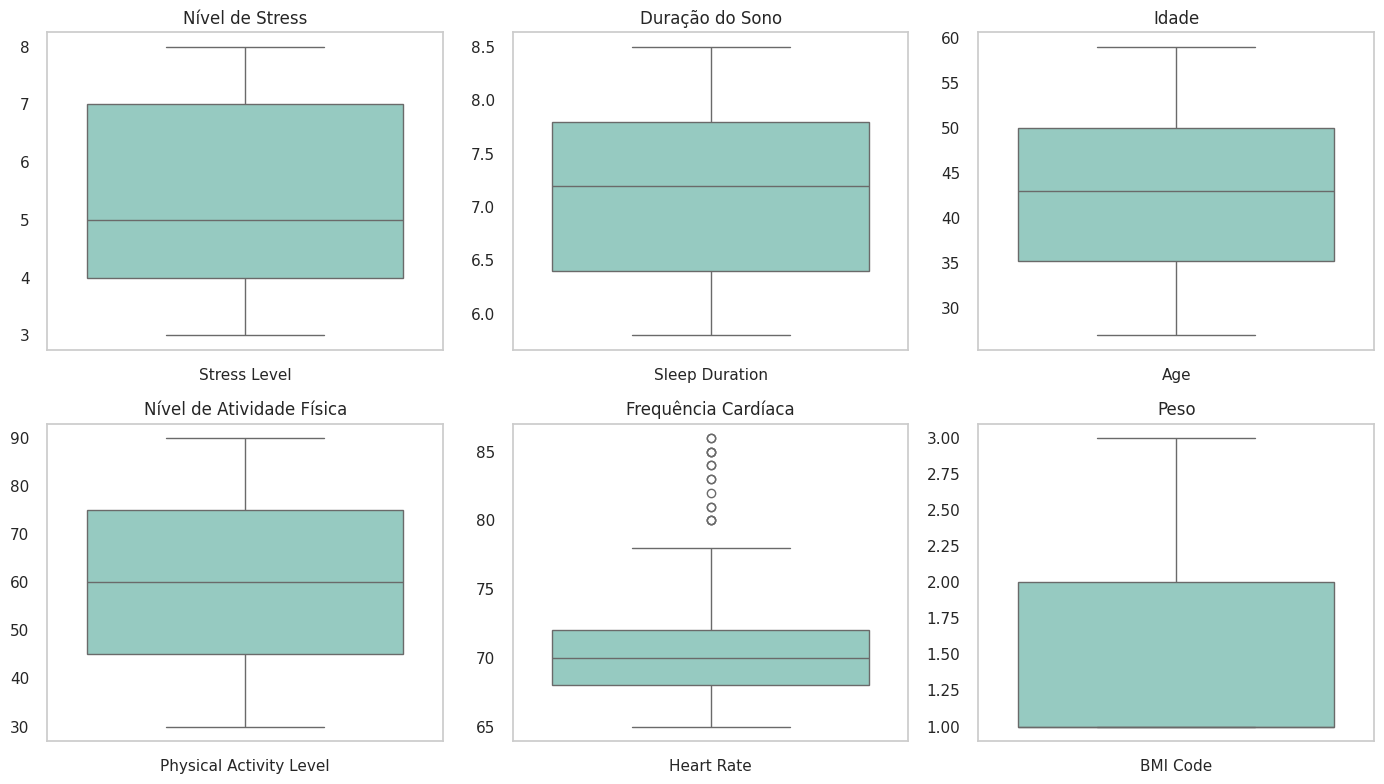

In [ ]:
# Configuração da grade para 3 colunas e 2 linhas
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

# Lista de colunas para análise e títulos
columns = [
    ('Stress Level', 'Nível de Stress'),
    ('Sleep Duration', 'Duração do Sono'),
    ('Age', 'Idade'),
    ('Physical Activity Level', 'Nível de Atividade Física'),
    ('Heart Rate', 'Frequência Cardíaca'),
    ('BMI Code', 'Peso')
]

# Loop para criar cada heatmap em sua posição
for i, (col1, title) in enumerate(columns):
    selected_columns = df[[col1]]

    # Seleciona o eixo correto
    ax = axs[i//3, i%3]

    sns.boxplot(data=selected_columns, ax=ax, palette="Set3")
    ax.grid(axis='y', linestyle='')
    ax.set_title(title)

# Ajuste o layout para evitar sobreposição
plt.tight_layout()
plt.show()

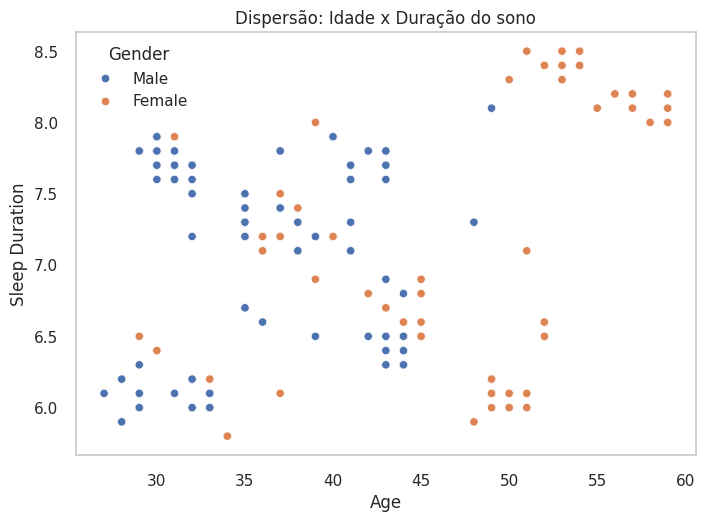

In [ ]:
# Gráfico de dispersão
sns.scatterplot(x='Age', y='Sleep Duration', data=df, hue='Gender')
plt.title('Dispersão: Idade x Duração do sono')
plt.grid(False)
plt.show()

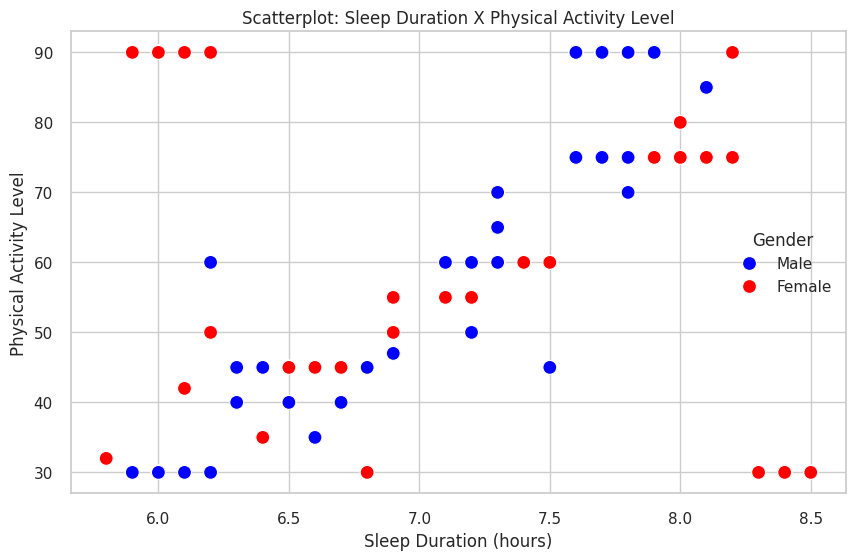

In [ ]:
# Criando o scatterplot com Seaborn
plt.figure(figsize=(10, 6))

size_data = df.groupby(['Sleep Duration', 'Physical Activity Level']).size().reset_index(name='Count')

sns.scatterplot(data=df,
                x='Sleep Duration',
                y='Physical Activity Level',
                hue='Gender',
                palette={'Male': 'blue', 'Female': 'red'},
                s=100)

# Adicionando título e rótulos
plt.title('Scatterplot: Sleep Duration X Physical Activity Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Physical Activity Level')

# Exibindo a legenda e o gráfico
plt.legend(title='Gender')
plt.show()

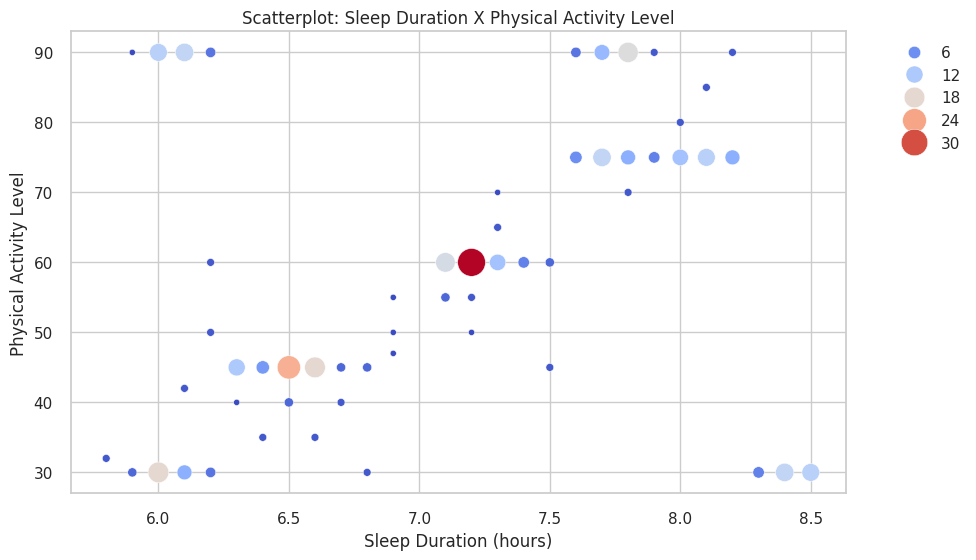

In [ ]:
plt.figure(figsize=(10, 6))

size_data = df.groupby(['Sleep Duration', 'Physical Activity Level']).size().reset_index(name='Count')

sns.scatterplot(
  data=size_data,
  x='Sleep Duration',
  y='Physical Activity Level',
  size='Count',
  hue='Count',
  palette='coolwarm',
  sizes=(20, 400))

# Adicionando título e rótulos
plt.title('Scatterplot: Sleep Duration X Physical Activity Level')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Physical Activity Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibindo a legenda e o gráfico
plt.show()

In [ ]:
df.set_index('Person ID', inplace=True)

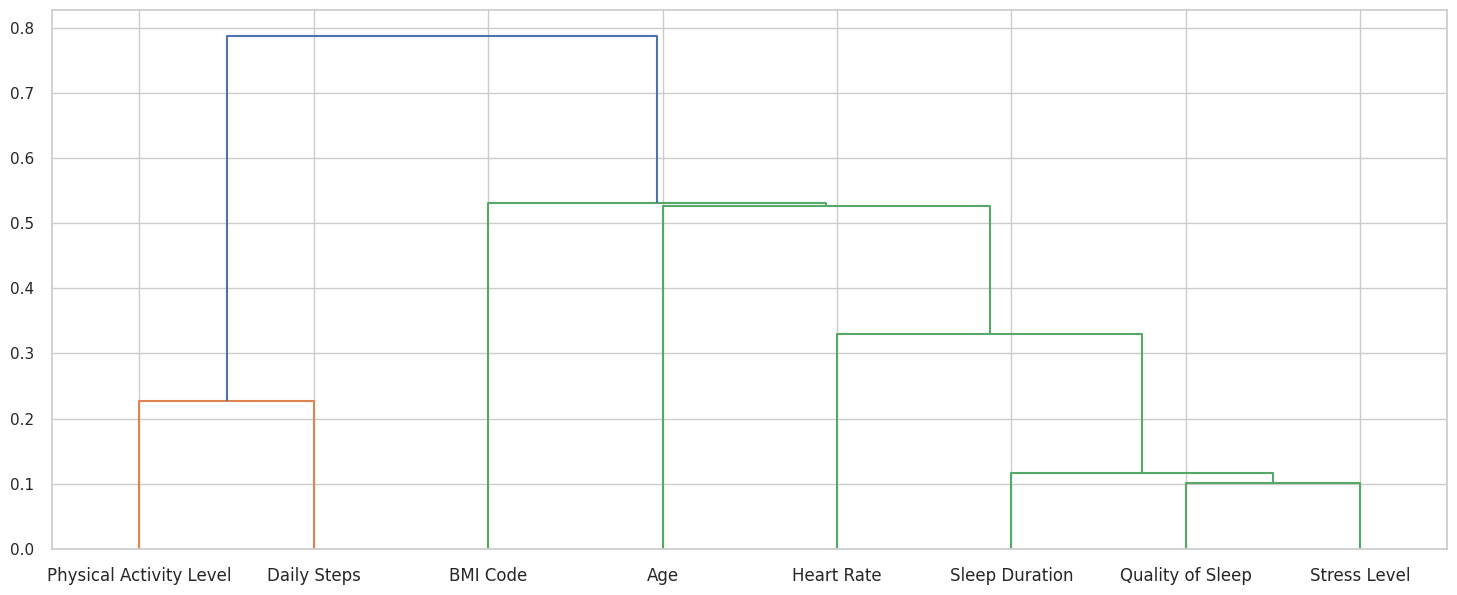

In [ ]:
similaridades_df = df.drop(columns=['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'])

correlation_matrix = similaridades_df.corr().abs()  # Matriz de correlação absoluta
distance_matrix = 1 - correlation_matrix  # Matriz de distância

# Converter a matriz de distância em formato condensado
condensed_distance_matrix = squareform(distance_matrix)

# Aplicar clusterização hierárquica
linked = linkage(condensed_distance_matrix, 'single')

# Plotar o dendrograma
plt.figure(figsize=(18, 7))
dendrogram(linked, labels=correlation_matrix.columns)
plt.show()

# Modelo Hierárquico

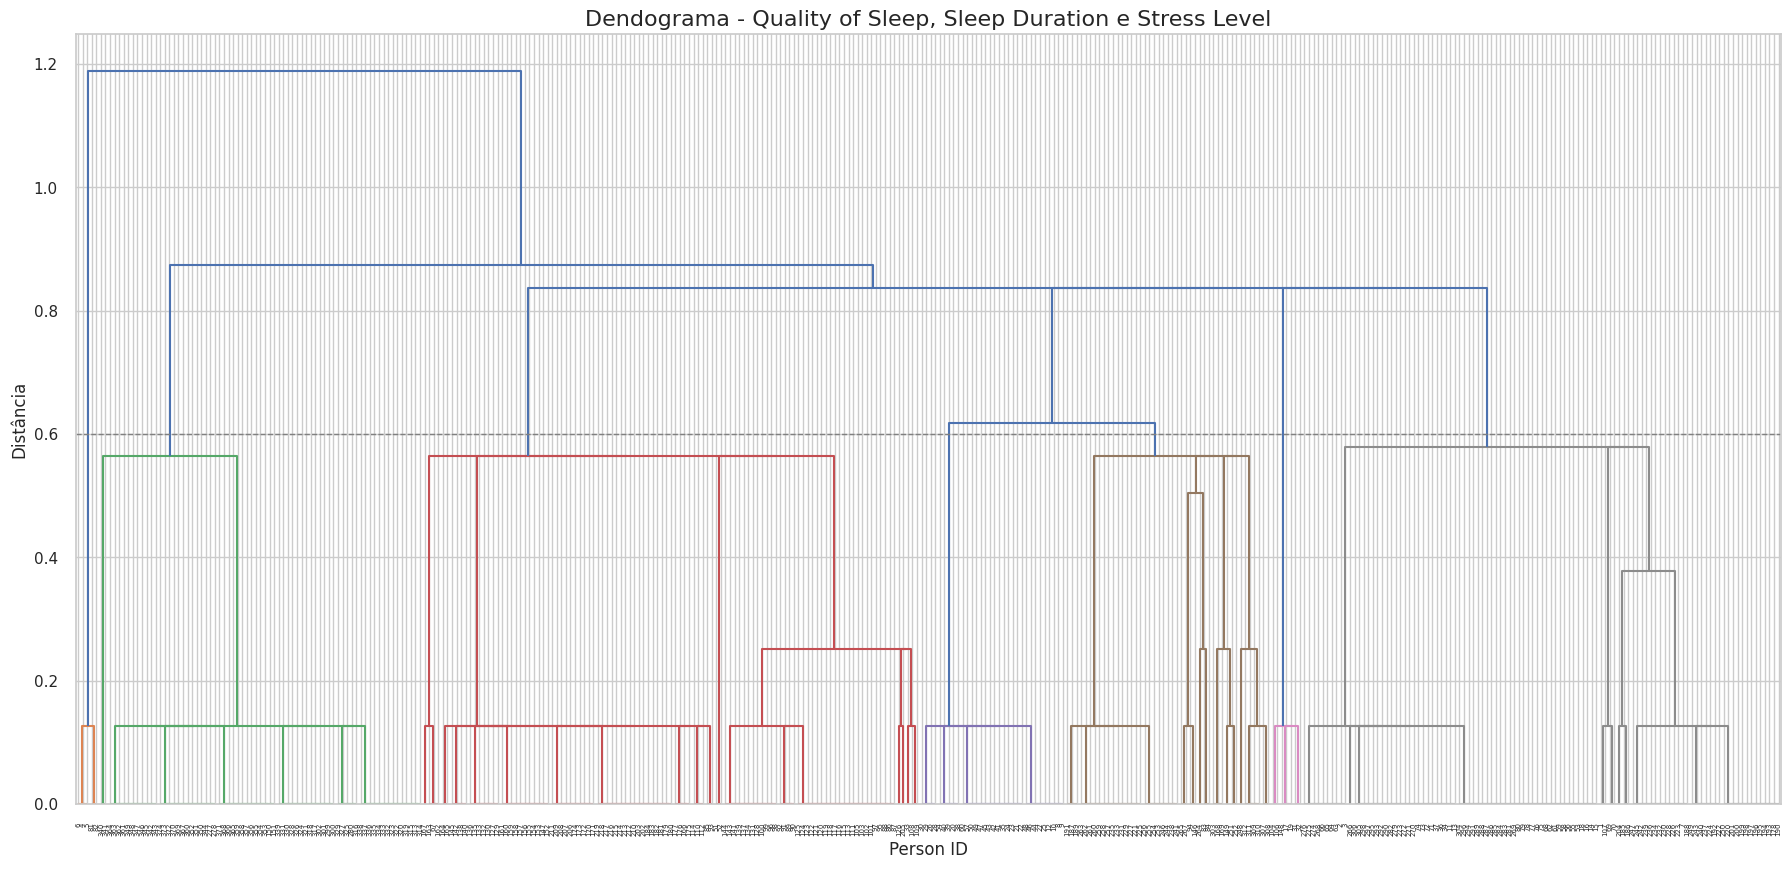

In [ ]:
df_hierarquico = df.copy()
# Instanciando o StandardScaler
scaler = StandardScaler()

# Ajusta e transforma os dados
df_hierarquico[['Quality of Sleep std', 'Sleep Duration std', 'Stress Level std']] = scaler.fit_transform(df_hierarquico[['Quality of Sleep', 'Sleep Duration', 'Stress Level']])

# Lista das features padronizadas
features = ['Quality of Sleep std', 'Sleep Duration std', 'Stress Level std']

# Cria a figura do plot
plt.figure(figsize=(22, 10))

# Calcula a distância entre cada amostra utilizando as features padronizadas
Z1 = single(df_hierarquico[features])

# Define o threshold de corte para os clusters
tr1 = 0.6

# Cria o dendograma com a linha horizontal para indicar os clusters
dendrogram(Z1, color_threshold=tr1, labels=df_hierarquico.index)
plt.axhline(y=tr1, c='grey', lw=1, linestyle='dashed')

# Configurações dos eixos e título
plt.xlabel('Person ID', fontsize=12)
plt.ylabel('Distância', fontsize=12)
plt.title('Dendograma - Quality of Sleep, Sleep Duration e Stress Level', fontsize=16)

# Mostra o gráfico
plt.show()

In [ ]:
clusters = fcluster(Z1, t=tr1, criterion='distance')
print(f"Nesta análise foram gerados {clusters.max()} clusters")

Nesta análise foram gerados 7 clusters




*   Apesar dos ajustes de padronização da escala das colunas, a quantidade de clusters gerados foi maior do que o modelo K-Means;
*   A quantidade de dados não foi considerada pequena para adotar o modelo hierárquico



# K-Means (Modelo Adotado)

## Antes da redução de variáveis (Categorias BMI Code, Age, Heart Rate, Sleep Duration, Quality of Sleep e Stress Level)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  BMI Code                 374 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 40.9+ KB


In [ ]:
df_kmeans= df.copy()
# Instanciando o StandardScaler
scaler = StandardScaler()

# Ajusta e transforma os dados
df_kmeans[['Quality of Sleep std', 'Sleep Duration std', 'Stress Level std', 'BMI Code std', 'Age std', 'Heart Rate std']] = scaler.fit_transform(df_hierarquico[['Quality of Sleep', 'Sleep Duration', 'Stress Level', 'BMI Code', 'Age', 'Heart Rate']])

features_kmeans = ['Quality of Sleep std', 'Sleep Duration std', 'Stress Level std', 'BMI Code std', 'Age std', 'Heart Rate std']

inertia = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_kmeans[features_kmeans])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

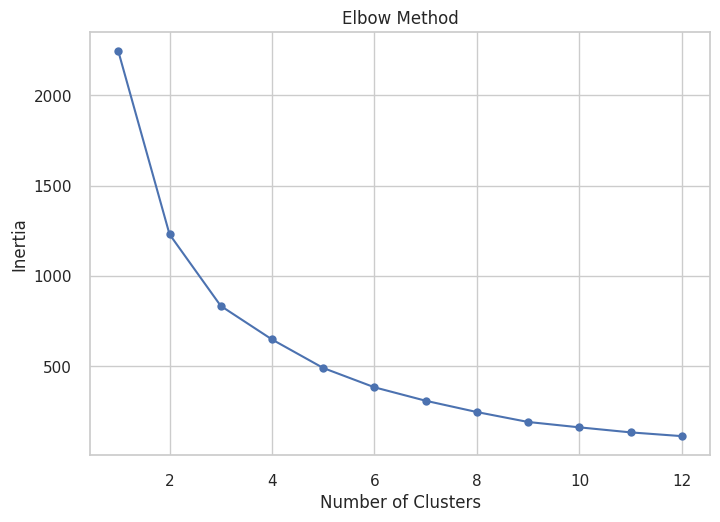

In [ ]:
plt.plot(range(1, 13), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
X = df_kmeans[features_kmeans]
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

    print('With in sum of squared error (WCSS) at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(X, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(X, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(X, labels))
    print("---------------------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

With in sum of squared error (WCSS) at K = 2 : 1230.2505269528067
Silhouette Coefficient: 0.449
Calinski-Harabasz Index: 306.535
Davies-Bouldin Index: 0.955
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 3 : 834.0077439250027
Silhouette Coefficient: 0.479
Calinski-Harabasz Index: 313.610
Davies-Bouldin Index: 0.882
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 4 : 648.3498079944275
Silhouette Coefficient: 0.504
Calinski-Harabasz Index: 303.535
Davies-Bouldin Index: 0.755
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 5 : 490.44922299074136
Silhouette Coefficient: 0.558
Calinski-Harabasz Index: 329.830
Davies-Bouldin Index: 0.658
---------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

With in sum of squared error (WCSS) at K = 6 : 383.5695985041042
Silhouette Coefficient: 0.586
Calinski-Harabasz Index: 356.983
Davies-Bouldin Index: 0.697
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 7 : 309.18028896741214
Silhouette Coefficient: 0.629
Calinski-Harabasz Index: 382.775
Davies-Bouldin Index: 0.603
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 8 : 246.61967632710457
Silhouette Coefficient: 0.640
Calinski-Harabasz Index: 423.464
Davies-Bouldin Index: 0.590
---------------------------------------------------------------
With in sum of squared error (WCSS) at K = 9 : 191.69994532646965
Silhouette Coefficient: 0.654
Calinski-Harabasz Index: 488.452
Davies-Bouldin Index: 0.513
---------------------------------------------------------------


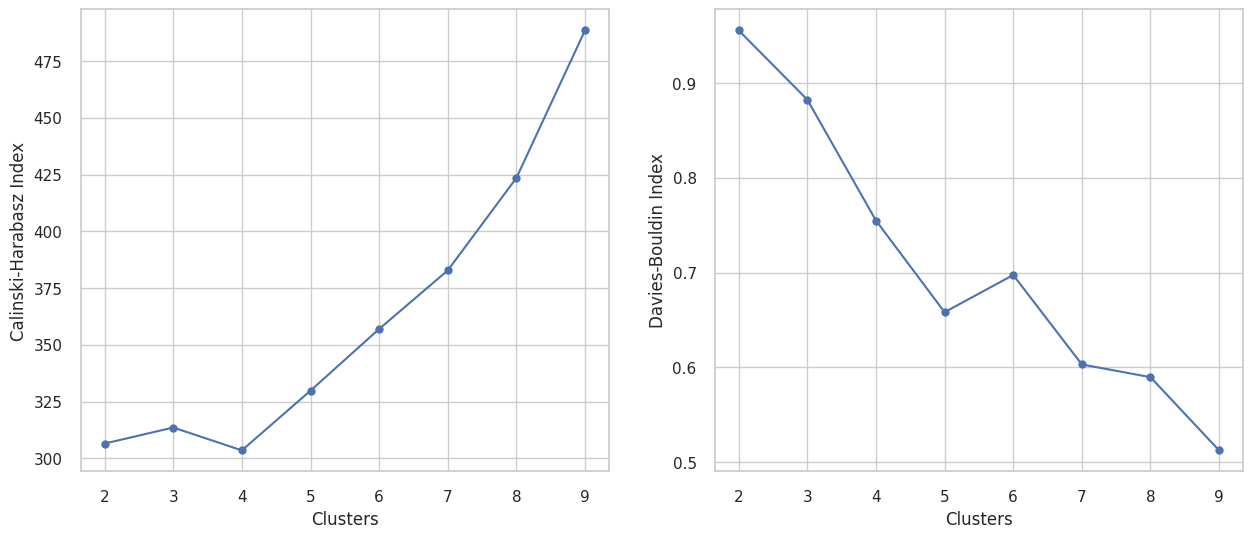

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

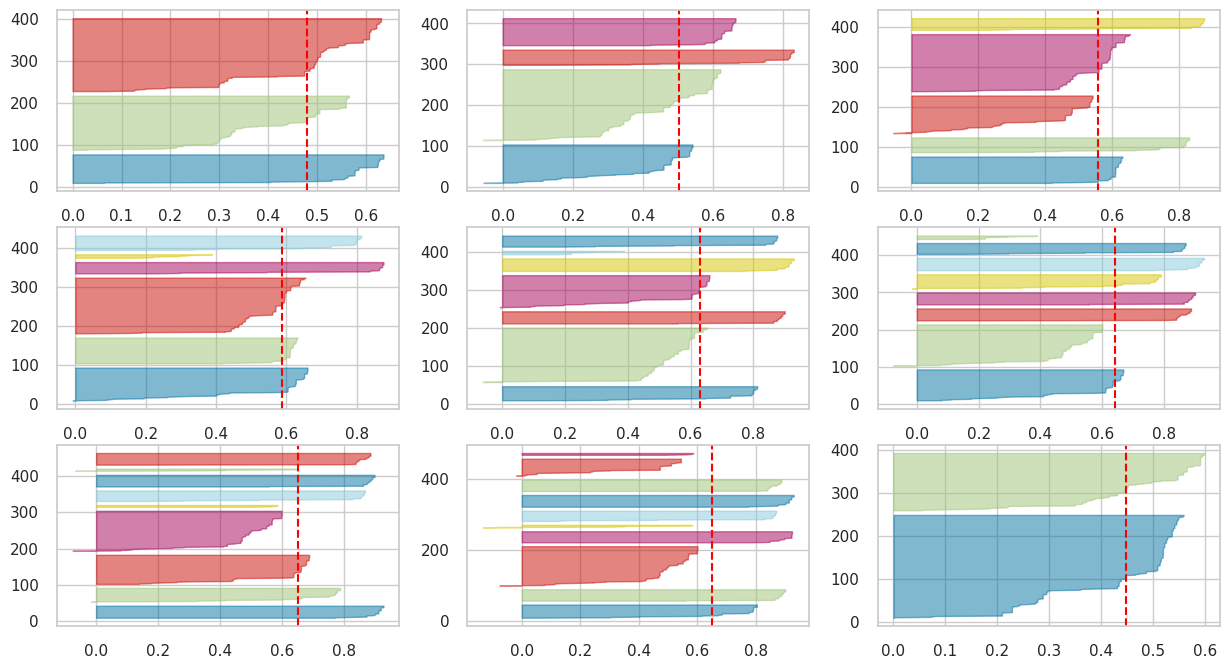

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3, 3, figsize=(15,8))
clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in clusters:
  q, mod = divmod(i, 3)
  km = KMeans(n_clusters=i, random_state=0)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

Também realizaremos análises com menos variáveis, tais quais 'Quality of Sleep std', 'Sleep Duration std', 'Stress Level std', a ser mostrado na próxima seção.

## Após a redução de Variáveis

### Definição da quantidade de Clusters

In [ ]:
df_kmeans= df.copy()
# Instanciando o StandardScaler
scaler = StandardScaler()

# Ajusta e transforma os dados
df_kmeans[['Quality of Sleep std', 'Sleep Duration std', 'Stress Level std']] = scaler.fit_transform(df_hierarquico[['Quality of Sleep', 'Sleep Duration', 'Stress Level']])

features_kmeans = ['Quality of Sleep std', 'Sleep Duration std', 'Stress Level std']

In [ ]:
inertia = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_kmeans[features_kmeans])
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

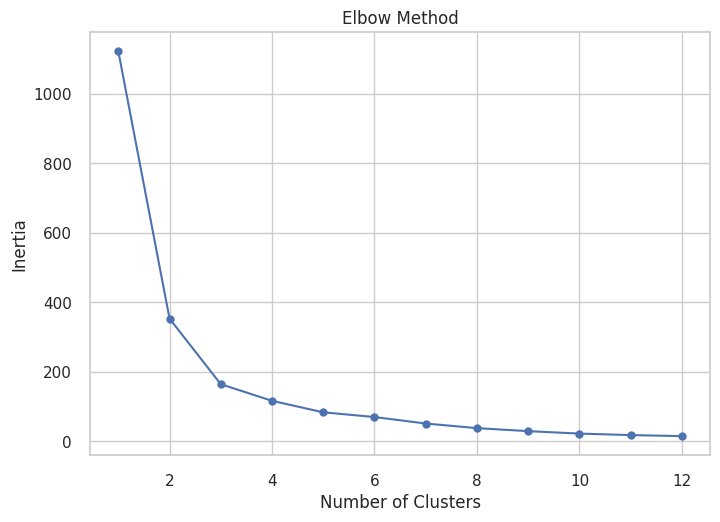

In [ ]:
plt.plot(range(1, 13), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
X=df_kmeans[features_kmeans]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

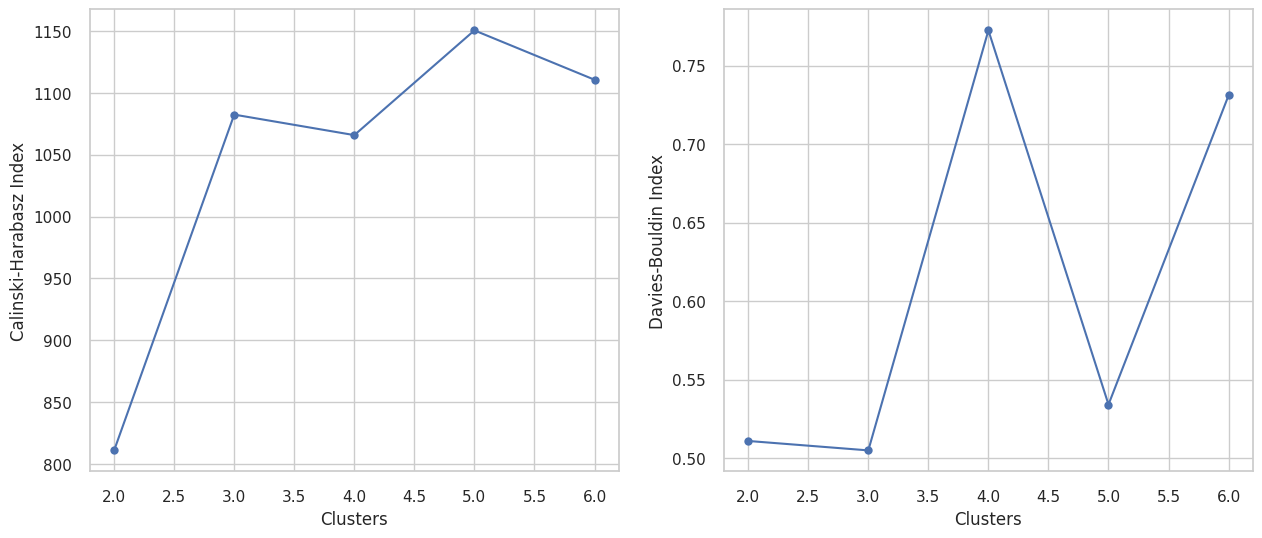

In [ ]:
se = []
sil_scores = []
calinski_score = []
davies_score = []
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=0)
    labels = kmeans.fit_predict(X)
    se.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, labels))
    calinski_score.append(calinski_harabasz_score(X, labels))
    davies_score.append(davies_bouldin_score(X, labels))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(index, calinski_score, marker='o')
ax[0].set_xlabel('Clusters')
ax[0].set_ylabel('Calinski-Harabasz Index')

ax[1].plot(index, davies_score, marker='o')
ax[1].set_xlabel('Clusters')
ax[1].set_ylabel('Davies-Bouldin Index')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

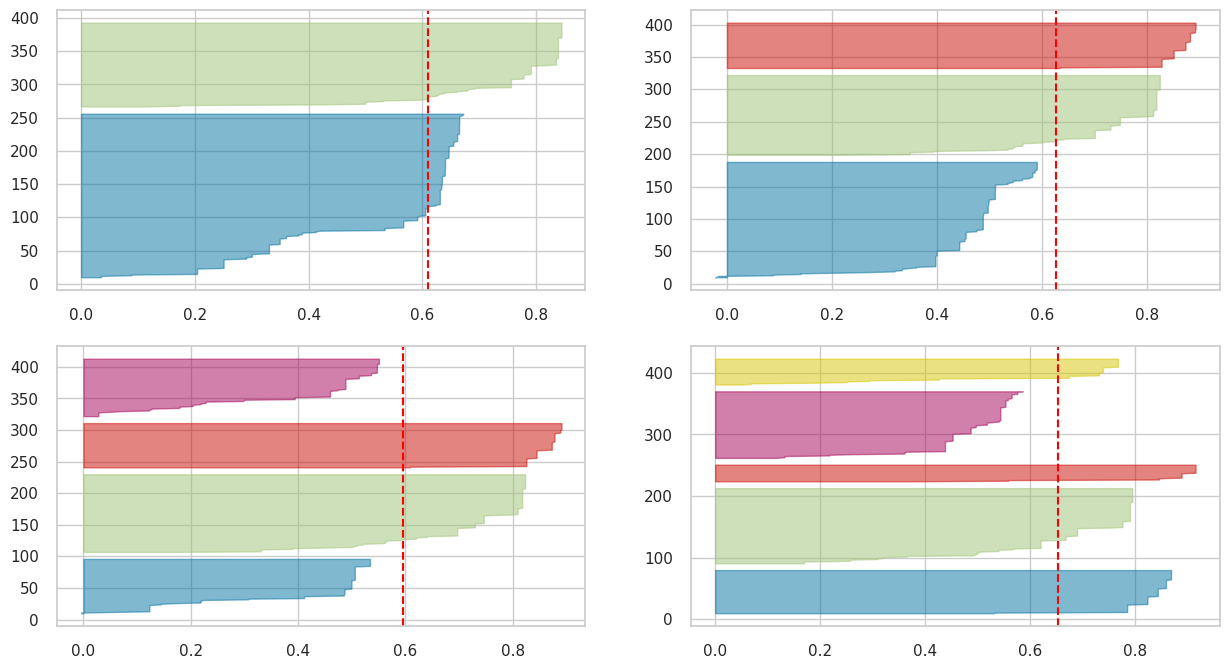

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
  q, mod = divmod(i, 2)
  km = KMeans(n_clusters=i, random_state=0)
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
  visualizer.fit(X)

A partir da análise dos gráficos que aferem a qualidade dos clusters, três clusters mostrou-se a melhor opção, pois:


*   Boa distribuição da quantidade de dados pelo gráfico de silhueta;
*   Satisfatórios coeficientes de Calinski e Davies, valor alto e tendendo a zero, respectivamente.



### Aplicação do Kmeans para 3 Clusters

In [ ]:
# Apply K-Means with the current value of k
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
df_kmeans['cluster_id'] = kmeans.fit_predict(df_kmeans[features_kmeans])
df_kmeans['cluster_id'] = df_kmeans['cluster_id'].astype(str)

In [ ]:
df_kmeans.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,BMI Code,Quality of Sleep std,Sleep Duration std,Stress Level std,cluster_id
Person ID,,,,,,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Sleep Apnea,2,-1.098280,-1.298887,0.347021,1
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea,1,-1.098280,-1.173036,1.475592,1
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Sleep Apnea,1,-1.098280,-1.173036,1.475592,1
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,3,-2.771424,-1.550588,1.475592,1
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,3,-2.771424,-1.550588,1.475592,1


#### Avaliação dos Clusters gerados

In [ ]:
df_cluster_0 = df_kmeans[df_kmeans['cluster_id'] == '0']
df_cluster_1 = df_kmeans[df_kmeans['cluster_id'] == '1']
df_cluster_2 = df_kmeans[df_kmeans['cluster_id'] == '2']

##### Cluster 0:

In [ ]:
#Cluster 0:
df_cluster_0.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Code,Quality of Sleep std,Sleep Duration std,Stress Level std
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,38.206704,7.321788,7.608939,65.502793,4.832402,68.804469,7179.888268,1.229050,0.247713,0.238741,-0.311838
std,4.927196,0.411527,0.489357,15.233160,0.796665,3.031813,1071.614339,0.471723,0.409382,0.517909,0.449546
min,29.000000,6.500000,7.000000,30.000000,3.000000,65.000000,3300.000000,1.000000,-0.261708,-0.795484,-1.345836
25%,35.000000,7.100000,7.000000,60.000000,4.000000,68.000000,6500.000000,1.000000,-0.261708,-0.040380,-0.781551
50%,38.000000,7.300000,8.000000,60.000000,5.000000,68.000000,8000.000000,1.000000,0.574864,0.211322,-0.217265
75%,43.000000,7.700000,8.000000,75.000000,5.000000,70.000000,8000.000000,1.000000,0.574864,0.714724,-0.217265
max,51.000000,7.900000,8.000000,90.000000,6.000000,84.000000,8000.000000,3.000000,0.574864,0.966426,0.347021


In [ ]:
# Agrupando por Gender e calculando estatísticas descritivas
df_pivot = df_cluster_0.pivot_table(index=['Gender'],
                          values=['Quality of Sleep', 'Sleep Duration', 'Stress Level'],
                          aggfunc=[np.mean, np.std, np.min, np.max, np.median, 'count']).reset_index()

# Exibir o DataFrame pivotado
print(df_pivot)

   Gender             mean                                          std  \
          Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0  Female         7.537313       6.946269     4.208955         0.502369   
1    Male         7.651786       7.546429     5.205357         0.478545   

                                           min                              \
  Sleep Duration Stress Level Quality of Sleep Sleep Duration Stress Level   
0       0.317341     0.591283                7            6.5            4   
1       0.275069     0.659489                7            6.7            3   

               max                                       median  \
  Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0                8            7.9            6              8.0   
1                8            7.9            6              8.0   

                                         count                              
  Sleep Duration Stress Level Quality of

<ipython-input-179-597af7e999a3>:2: FutureWarning: The provided callable <function mean at 0x7cd58790bd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = df_cluster_0.pivot_table(index=['Gender'],
<ipython-input-179-597af7e999a3>:2: FutureWarning: The provided callable <function std at 0x7cd58790beb0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_pivot = df_cluster_0.pivot_table(index=['Gender'],
<ipython-input-179-597af7e999a3>:2: FutureWarning: The provided callable <function min at 0x7cd58790b5b0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_pivot = df_cluster_0.pivot_table(index=['Ge

In [ ]:
# Agrupando por BMI Category e calculando estatísticas descritivas
df_pivot = df_cluster_0.pivot_table(index=['BMI Category'],
                          values=['Quality of Sleep', 'Sleep Duration', 'Stress Level'],
                          aggfunc=[np.mean, np.std, np.min, np.max, np.median, 'count']).reset_index()

# Exibir o DataFrame pivotado
print(df_pivot)

  BMI Category             mean                                          std  \
               Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0       Normal         7.760563       7.471831     4.943662         0.428250   
1        Obese         7.000000       7.350000     5.000000         0.000000   
2   Overweight         7.030303       6.672727     4.333333         0.174078   

                                           min                              \
  Sleep Duration Stress Level Quality of Sleep Sleep Duration Stress Level   
0       0.284435     0.787983                7            6.9            3   
1       0.057735     0.000000                7            7.3            5   
2       0.225378     0.692219                7            6.5            4   

               max                                       median  \
  Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0                8            7.9            6              8.0   
1      

<ipython-input-180-e4816d335263>:2: FutureWarning: The provided callable <function mean at 0x7cd58790bd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = df_cluster_0.pivot_table(index=['BMI Category'],
<ipython-input-180-e4816d335263>:2: FutureWarning: The provided callable <function std at 0x7cd58790beb0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_pivot = df_cluster_0.pivot_table(index=['BMI Category'],
<ipython-input-180-e4816d335263>:2: FutureWarning: The provided callable <function min at 0x7cd58790b5b0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_pivot = df_cluster_0.pivot_tabl

Quantidade de Pessoas: 179

Com relação às variáveis utilizadas para a definição dos clusters:
* Tempo de sono
  *   Média de 7,3 Horas, variando de 6,5 horas até 7,9 horas.
  *   75% do grupo são com valor superior a 7,1 horas.
* Qualidade do Sono:
  * O grupo possuí apenas pessoas com qualidade 8 e 7, mais pessoas com 8 que com 7.
* Nível de Estresse
  * O nível de estresse médio é 4.8, com mais da metade dos valores superiores a 5.

Analisando as demais variáveis do Grupo:

* Idade:
  *   Média: 38 Anos, variando de 29 a 51 anos.
* Gênero:
  * Grupo Majoritariamente formado por Homens (62,57%);
  * As mulheres desse cluster possuem um nível de estresse menor que os homens e possuem tempo de sono menor mas possuem qualidade de sono próximo.
  * Essa análise quer dizer que: Menos tempo e menos estresse = Mais qualidade de sono. Logo, para uma pessoa com tempo de sono maior, ela precisa ter um nível de estresse maior para ter uma qualidade de sono Muito boa ou Boa

* Categoria de Peso:
  * A maioria das pessoas são de Categoria de Peso Normal, 79,33%, com 4 obesos e 33 acima do peso.
  * Os 3 grupos possuem uma qualidade média acima de 7, com o tempo de duração de sono próximo de 7h e com nível de estresse próximo de 5.
  * As pessoas das categorias normal e obesa desse grupo têm um nível de estresse médio próximo de 5 e um tempo de sono parecido.
  * O que nos permitir inferir que para esse grupo, as pessoas obesas em comparação com as normais têm uma qualidade de sono pior considerando que dorme uma quantidade de horas aproximada e têm um nível de estresse parecido.
  * As pessoas com sobrepeso, estão dentro da análise de menos tempo de sono e menos estresse, não permitindo inferir algo sobre o sobrepeso.

Além disso, é grupo relativamente ativo com média de 65.50 e mais de 75% das pessoas acima dessa média de atividade física.



##### Cluster 1:

In [ ]:
#Cluster 1:
df_cluster_1.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Code,Quality of Sleep std,Sleep Duration std,Stress Level std
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,40.693548,6.221774,5.919355,52.096774,7.532258,73.854839,6733.064516,1.725806,-1.165746,-1.145633,1.211652
std,8.154182,0.234282,0.519487,23.437313,0.562160,3.048906,2196.846290,0.515432,0.434588,0.294845,0.317219
min,27.000000,5.800000,4.000000,30.000000,6.000000,69.000000,3000.000000,1.000000,-2.771424,-1.676439,0.347021
25%,32.750000,6.000000,6.000000,30.000000,7.000000,72.000000,5000.000000,1.000000,-1.098280,-1.424738,0.911306
50%,43.000000,6.150000,6.000000,45.000000,8.000000,72.000000,6000.000000,2.000000,-1.098280,-1.235962,1.475592
75%,49.000000,6.400000,6.000000,90.000000,8.000000,75.000000,10000.000000,2.000000,-1.098280,-0.921335,1.475592
max,52.000000,6.900000,7.000000,90.000000,8.000000,85.000000,10000.000000,3.000000,-0.261708,-0.292081,1.475592


In [ ]:
len(df_cluster_1[df_cluster_1['Quality of Sleep'] >= 7])/len(df_cluster_1)*100

5.64516129032258

In [ ]:
# Agrupando por Gender e calculando estatísticas descritivas
df_pivot = df_cluster_1.pivot_table(index=['Gender'],
                          values=['Quality of Sleep', 'Sleep Duration', 'Stress Level'],
                          aggfunc=[np.mean, np.std, np.min, np.max, np.median, 'count']).reset_index()

# Exibir o DataFrame pivotado
print(df_pivot)

   Gender             mean                                          std  \
          Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0  Female         5.959184       6.183673     7.632653         0.610982   
1    Male         5.893333       6.246667     7.466667         0.452421   

                                           min                              \
  Sleep Duration Stress Level Quality of Sleep Sleep Duration Stress Level   
0       0.244393     0.601868                4            5.8            6   
1       0.225612     0.528469                4            5.9            6   

               max                                       median  \
  Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0                7            6.8            8              6.0   
1                7            6.9            8              6.0   

                                         count                              
  Sleep Duration Stress Level Quality of

<ipython-input-183-30d73c2f0c8d>:2: FutureWarning: The provided callable <function mean at 0x7cd58790bd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = df_cluster_1.pivot_table(index=['Gender'],
<ipython-input-183-30d73c2f0c8d>:2: FutureWarning: The provided callable <function std at 0x7cd58790beb0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_pivot = df_cluster_1.pivot_table(index=['Gender'],
<ipython-input-183-30d73c2f0c8d>:2: FutureWarning: The provided callable <function min at 0x7cd58790b5b0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_pivot = df_cluster_1.pivot_table(index=['Ge

In [ ]:
# Agrupando por BMI Category e calculando estatísticas descritivas
df_pivot = df_cluster_1.pivot_table(index=['BMI Category'],
                          values=['Quality of Sleep', 'Sleep Duration', 'Stress Level'],
                          aggfunc=[np.mean, np.std, np.min, np.max, np.median, 'count']).reset_index()

# Exibir o DataFrame pivotado
print(df_pivot)

  BMI Category             mean                                          std  \
               Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0       Normal         5.894737       6.126316     7.868421         0.311012   
1        Obese         4.500000       6.000000     7.750000         1.000000   
2   Overweight         6.000000       6.276829     7.365854         0.471405   

                                           min                              \
  Sleep Duration Stress Level Quality of Sleep Sleep Duration Stress Level   
0       0.191275     0.342570                5            6.0            7   
1       0.200000     0.500000                4            5.9            7   
2       0.235335     0.577611                4            5.8            6   

               max                                       median  \
  Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0                6            6.9            8              6.0   
1      

<ipython-input-184-1c3075e28d47>:2: FutureWarning: The provided callable <function mean at 0x7cd58790bd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = df_cluster_1.pivot_table(index=['BMI Category'],
<ipython-input-184-1c3075e28d47>:2: FutureWarning: The provided callable <function std at 0x7cd58790beb0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_pivot = df_cluster_1.pivot_table(index=['BMI Category'],
<ipython-input-184-1c3075e28d47>:2: FutureWarning: The provided callable <function min at 0x7cd58790b5b0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_pivot = df_cluster_1.pivot_tabl

Total de Pessoas: 124 com 60,48% de Homens

* Tempo de sono
  *   Média de 6,2 Horas, variando de 5,8 horas até 6,9 horas. É um grupo que majoritariamente dorme
em comparação ao grupo do cluster 0, sendo 77% do grupo menor que o menor valor do cluster 1.

* Qualidade do Sono:
  * Cerca de 95% do grupo possuí uma qualidade de sono menor que 7, com média de 5.91 mas que varia entre 4 e 7.

* Nível de Estresse
  * O nível de estresse médio é 7.5, sendo um grupo bem estressado, com mais de 75% das pessoas com mais de 7 de estresse.

Analisando as demais variáveis do Grupo:
* Gênero:
  * Grupo Majoritariamente formado por Homens cerca de 60%;
  * Homens e mulheres estão mais homogêneos para as variáveis de qualidade do sono, duração do sono e nível de estresse.
* Categoria de Peso:
  * A maioria das pessoas são da Categoria Sobrepeso, 66,12%, com 4 obesos e 38 com peso normal.
  * Mais uma vez é possível ver a relação entre as pessoas de sobre peso e peso normal, relacionando nível de estresse e duração do sono com uma pior qualidade de sono
  * Mais uma vez, obesos fugiram um pouco

O que caracteriza esse grupo, é um grupo mais homogêneo entre homens e mulheres com relação aos dados avaliados para formação dos clusters. Além disso, é um grupo mais estressado e com menos horas de sono, fazendo com que a nota caia bastante.

##### Cluster 2:

In [ ]:
#Cluster 2:
df_cluster_2.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,BMI Code,Quality of Sleep std,Sleep Duration std,Stress Level std
count,71.000000,71.000000,71.0,71.000000,71.000000,71.000000,71.000000,71.000000,7.100000e+01,71.000000,71.000000
mean,54.816901,8.243662,9.0,55.563380,3.028169,67.154930,6047.887324,1.521127,1.411435e+00,1.398927,-1.329941
std,4.001106,0.181842,0.0,23.506068,0.166633,3.659227,1264.443317,0.557011,2.236250e-16,0.228849,0.094029
min,39.000000,8.000000,9.0,30.000000,3.000000,65.000000,3700.000000,1.000000,1.411435e+00,1.092276,-1.345836
25%,53.000000,8.100000,9.0,30.000000,3.000000,65.000000,5000.000000,1.000000,1.411435e+00,1.218127,-1.345836
50%,54.000000,8.200000,9.0,75.000000,3.000000,67.000000,5000.000000,1.000000,1.411435e+00,1.343978,-1.345836
75%,58.000000,8.400000,9.0,75.000000,3.000000,68.000000,7000.000000,2.000000,1.411435e+00,1.595679,-1.345836
max,59.000000,8.500000,9.0,90.000000,4.000000,86.000000,10000.000000,3.000000,1.411435e+00,1.721530,-0.781551


In [ ]:
# Agrupando por Gender e calculando estatísticas descritivas
df_pivot = df_cluster_2.pivot_table(index=['Gender'],
                          values=['Quality of Sleep', 'Sleep Duration', 'Stress Level'],
                          aggfunc=[np.mean, np.std, np.min, np.max, np.median, 'count']).reset_index()

# Exibir o DataFrame pivotado
print(df_pivot)

   Gender             mean                                          std  \
          Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0  Female              9.0       8.247826     3.028986              0.0   
1    Male              9.0       8.100000     3.000000              0.0   

                                           min                              \
  Sleep Duration Stress Level Quality of Sleep Sleep Duration Stress Level   
0       0.182796     0.168995                9            8.0            3   
1       0.000000     0.000000                9            8.1            3   

               max                                       median  \
  Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0                9            8.5            4              9.0   
1                9            8.1            3              9.0   

                                         count                              
  Sleep Duration Stress Level Quality of

<ipython-input-186-ea69503c3416>:2: FutureWarning: The provided callable <function mean at 0x7cd58790bd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = df_cluster_2.pivot_table(index=['Gender'],
<ipython-input-186-ea69503c3416>:2: FutureWarning: The provided callable <function std at 0x7cd58790beb0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_pivot = df_cluster_2.pivot_table(index=['Gender'],
<ipython-input-186-ea69503c3416>:2: FutureWarning: The provided callable <function min at 0x7cd58790b5b0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_pivot = df_cluster_2.pivot_table(index=['Ge

In [ ]:
# Agrupando por BMI Category e calculando estatísticas descritivas
df_pivot = df_cluster_2.pivot_table(index=['BMI Category'],
                          values=['Quality of Sleep', 'Sleep Duration', 'Stress Level'],
                          aggfunc=[np.mean, np.std, np.min, np.max, np.median, 'count']).reset_index()

# Exibir o DataFrame pivotado
print(df_pivot)

<ipython-input-187-f1a976c1a561>:2: FutureWarning: The provided callable <function mean at 0x7cd58790bd90> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_pivot = df_cluster_2.pivot_table(index=['BMI Category'],


  BMI Category             mean                                          std  \
               Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0       Normal              9.0       8.388889     3.000000              0.0   
1        Obese              9.0       8.100000     3.000000              0.0   
2   Overweight              9.0       8.093939     3.060606              0.0   

                                           min                              \
  Sleep Duration Stress Level Quality of Sleep Sleep Duration Stress Level   
0       0.128236     0.000000                9            8.0            3   
1       0.000000     0.000000                9            8.1            3   
2       0.078817     0.242306                9            8.0            3   

               max                                       median  \
  Quality of Sleep Sleep Duration Stress Level Quality of Sleep   
0                9            8.5            3              9.0   
1      

<ipython-input-187-f1a976c1a561>:2: FutureWarning: The provided callable <function std at 0x7cd58790beb0> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  df_pivot = df_cluster_2.pivot_table(index=['BMI Category'],
<ipython-input-187-f1a976c1a561>:2: FutureWarning: The provided callable <function min at 0x7cd58790b5b0> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df_pivot = df_cluster_2.pivot_table(index=['BMI Category'],
<ipython-input-187-f1a976c1a561>:2: FutureWarning: The provided callable <function max at 0x7cd58790b490> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df_pivot = df_cluster_2.pivot_table(i

Grupo composto quase que apenas por mulheres, 97% são mulheres, do total de 71 pessoas do grupo.

* Com relação às variáveis utilizadas para a definição dos clusters:
Tempo de sono
  *   Média de 8,2 Horas, maior média dos grupos, variando de 8 horas até 8,5 horas.
* Qualidade do Sono:
  * O grupo todo pussuí qualidade de sono 9.
* Nível de Estresse
  * O nível de estresse médio é 3.03, sendo um grupo bem muito pouco estressado, com mais de 75% das pessoas com menos de 4 de estresse.

* Categoria de Peso:
  * O grupo está bem dividido entre as Categoria Sobrepeso e Normal, 46,49% e 50,70% respectivamente, com 2 obesos apenas.
  * Para esse grupo não é possível visualizar a relação a categoria de peso e as variáveis de qualidade do sono, duração do sono e nível de estresse.

É o grupo formado mais homogêneo para os parâmetros, e com o de melhor qualidade de sono.

##### Comparação das variáveis:

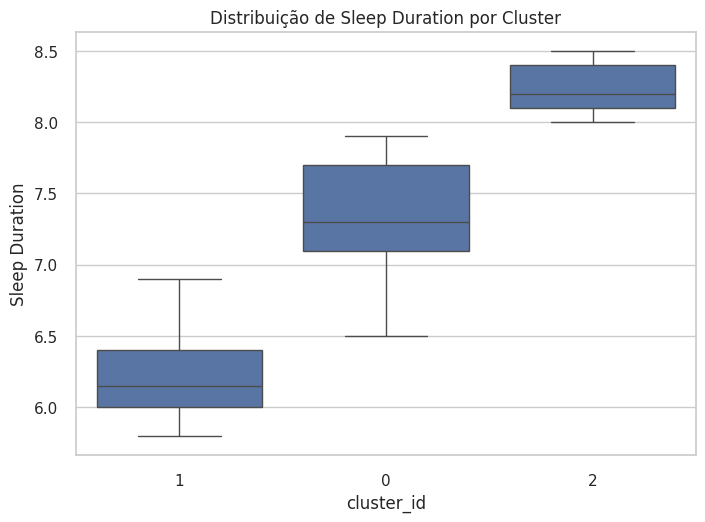

In [ ]:
# Plotar boxplots para Sleep Duration por cluster
sns.boxplot(x='cluster_id', y='Sleep Duration', data=df_kmeans)
plt.title('Distribuição de Sleep Duration por Cluster')
plt.show()

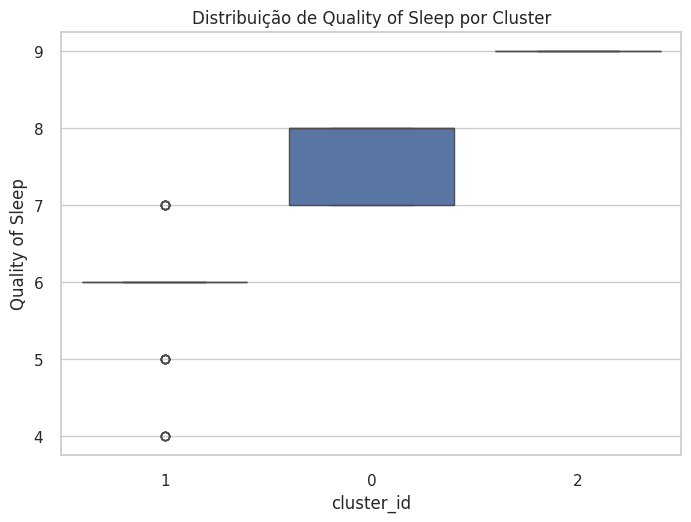

In [ ]:
# Plotar boxplots para Quality of Sleep por cluster
sns.boxplot(x='cluster_id', y='Quality of Sleep', data=df_kmeans)
plt.title('Distribuição de Quality of Sleep por Cluster')
plt.show()

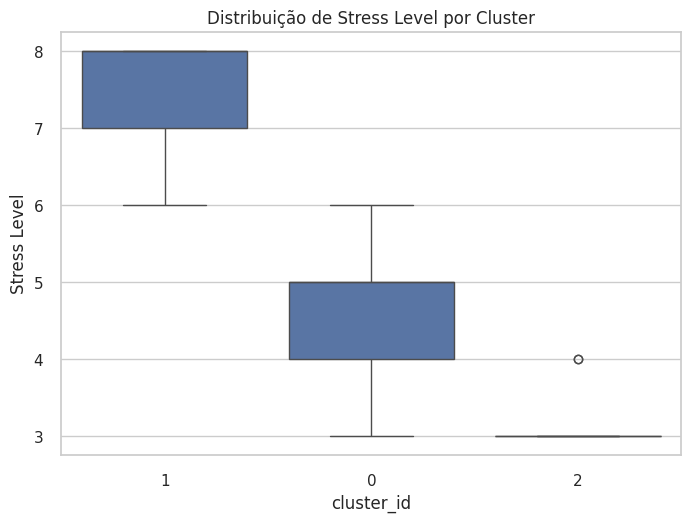

In [ ]:
# Plotar boxplots para Stress Level por cluster
sns.boxplot(x='cluster_id', y='Stress Level', data=df_kmeans)
plt.title('Distribuição de Stress Level por Cluster')
plt.show()

#### Old

In [ ]:
hex_colors = [
    "#8B0000",  # Vermelho
    "#008000",  # Verde
    "#3357FF",  # Azul
]
custom_palette = sns.color_palette(hex_colors)

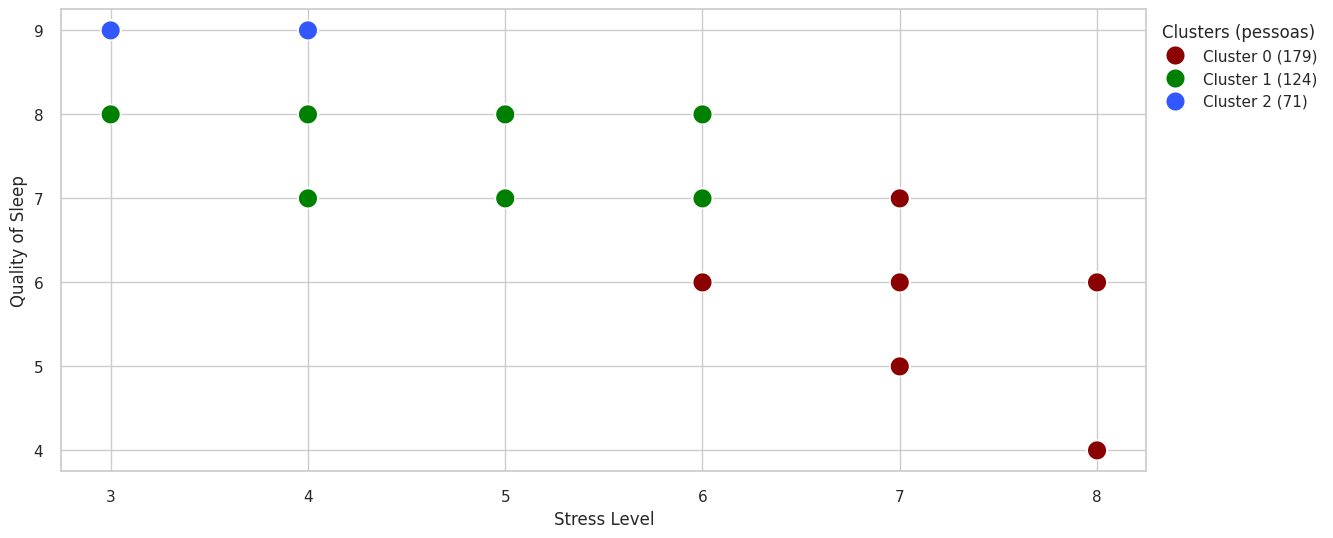

In [ ]:
coord_counts = df_kmeans.groupby(['Stress Level', 'Quality of Sleep', 'cluster_id']).size().reset_index(name='Count')

cluster_counts = df_kmeans['cluster_id'].value_counts().sort_index()

custom_labels = [f"Cluster {i} ({count})" for i, count in cluster_counts.items()]

# Renomear a coluna 'Count' no dataframe original, se ela existir, para evitar conflito
if 'Count' in df_kmeans.columns:
    df_kmeans = df_kmeans.rename(columns={'Count': 'Original_Count'})

# Mesclar as contagens de volta ao dataframe original
df_kmeans = pd.merge(df_kmeans, coord_counts, on=['Stress Level', 'Quality of Sleep', 'cluster_id'], how='left')

# Criar o gráfico de dispersão com coloração por cluster
plt.figure(figsize=(14, 6))
ax = sns.scatterplot(
    data=df_kmeans, s=200, x='Stress Level', y='Quality of Sleep',
    hue='cluster_id', palette=custom_palette
)


# Atualizar os rótulos da legenda com os labels personalizados
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, custom_labels, title="Clusters (pessoas)", bbox_to_anchor=(1, 1), loc='upper left')

# Exibir o gráfico
plt.show()

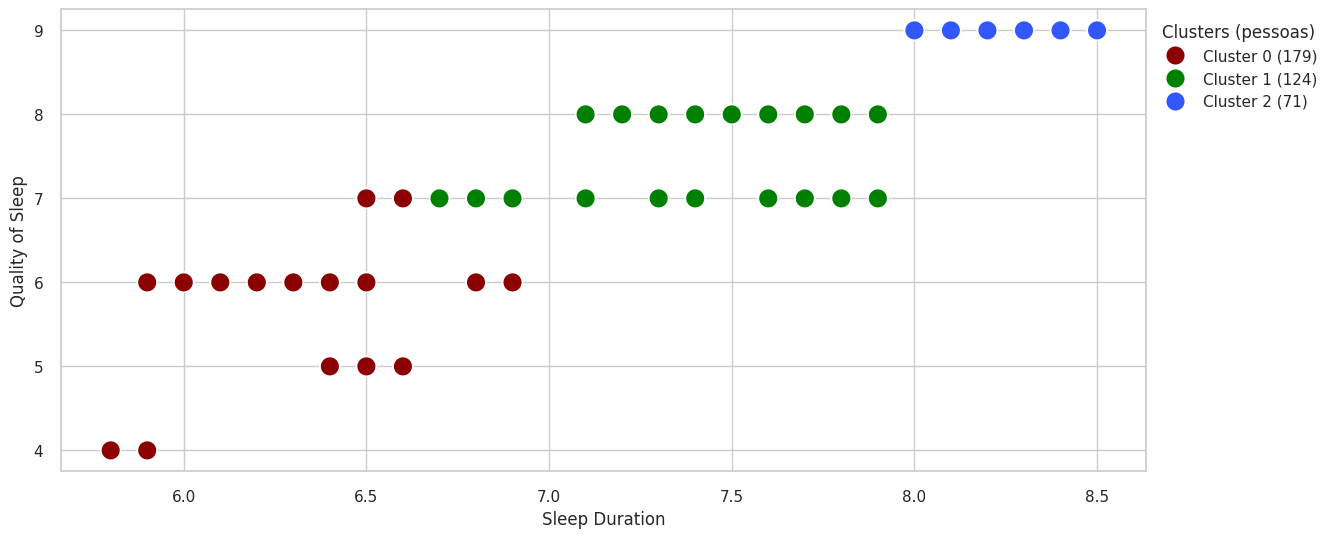

In [ ]:
coord_counts = df_kmeans.groupby(['Sleep Duration', 'Quality of Sleep', 'cluster_id']).size().reset_index(name='Count')

cluster_counts = df_kmeans['cluster_id'].value_counts().sort_index()

custom_labels = [f"Cluster {i} ({count})" for i, count in cluster_counts.items()]

# Renomear a coluna 'Count' no dataframe original, se ela existir, para evitar conflito
if 'Count' in df_kmeans.columns:
    df_kmeans = df_kmeans.rename(columns={'Count': 'Original_Count'})

# Mesclar as contagens de volta ao dataframe original
df_kmeans = pd.merge(df_kmeans, coord_counts, on=['Sleep Duration', 'Quality of Sleep', 'cluster_id'], how='left')

# Criar o gráfico de dispersão com coloração por cluster
plt.figure(figsize=(14, 6))
ax = sns.scatterplot(
    data=df_kmeans, s=200, x='Sleep Duration', y='Quality of Sleep',
    hue='cluster_id', palette=custom_palette
)


# Atualizar os rótulos da legenda com os labels personalizados
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, custom_labels, title="Clusters (pessoas)", bbox_to_anchor=(1, 1), loc='upper left')

# Exibir o gráfico
plt.show()

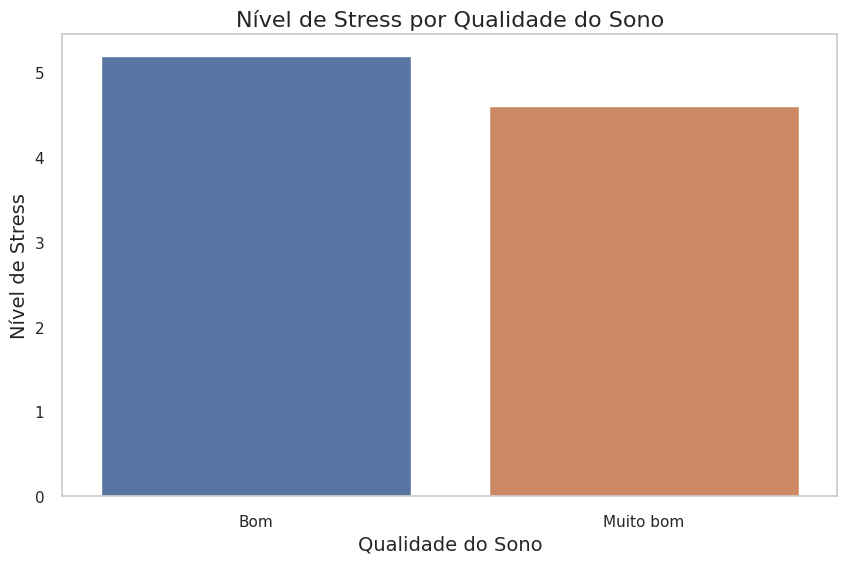

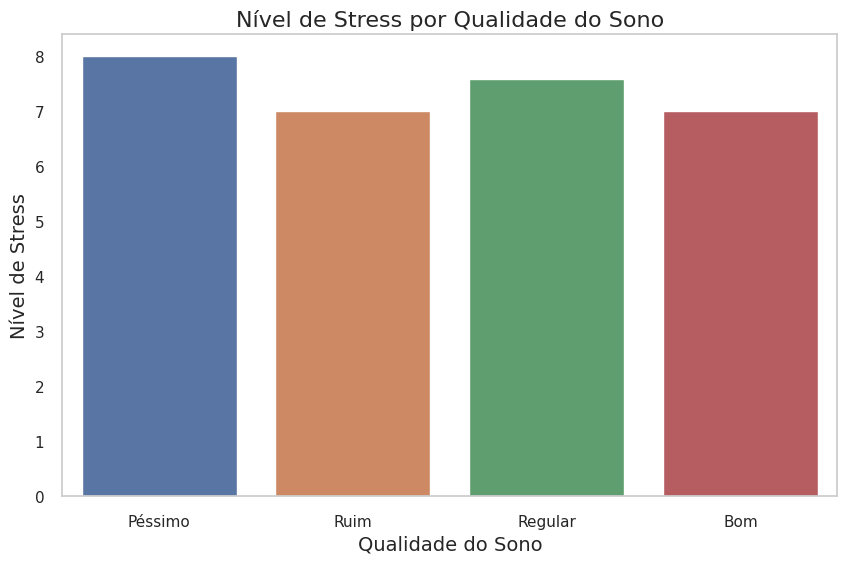

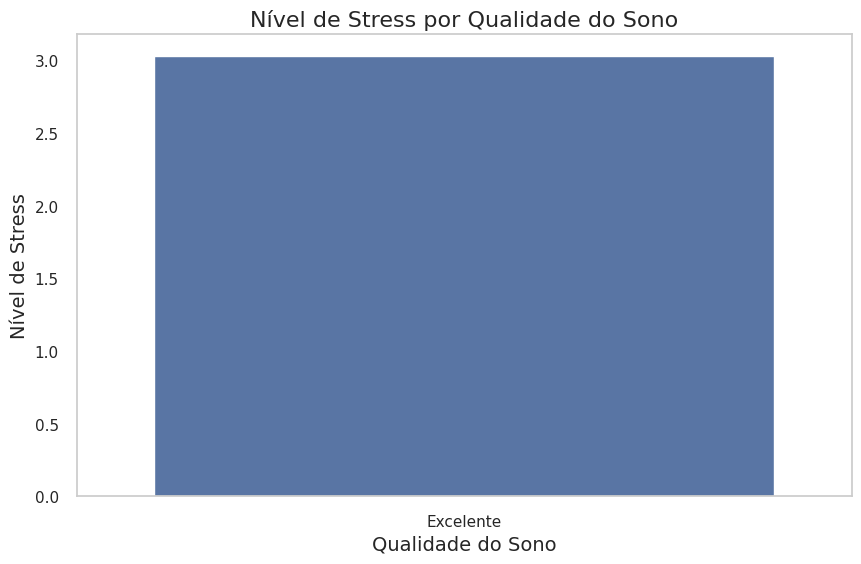

In [ ]:
# Configurar o estilo do gráfico
sns.set(style="whitegrid")


df_quality_status = df_kmeans.sort_values(by='Quality of Sleep')

df_quality_status['Quality of Sleep'].replace({
    9: 'Excelente',
    8: 'Muito bom',
    7: 'Bom',
    6: 'Regular',
    5: 'Ruim',
    4: 'Péssimo'
}, inplace=True)

custom_palette = ['#F44336', '#FF5722', '#FFC107','#FFEB3B', '#8BC34A', '#4CAF50']

for i in ['0', '1', '2']:
  df_quality_status_plt = df_quality_status[df_quality_status['cluster_id'] == i]
  # Criar o gráfico de barras
  plt.figure(figsize=(10, 6))

  sns.barplot(x='Quality of Sleep', y='Stress Level', hue='Quality of Sleep', data=df_quality_status_plt, errorbar=None)

  # Configurações adicionais
  plt.title('Nível de Stress por Qualidade do Sono', fontsize=16)
  plt.grid(False)
  plt.xlabel('Qualidade do Sono', fontsize=14)
  plt.ylabel('Nível de Stress', fontsize=14)

  plt.show()

# Técnica de Redução de Dimensionalidade -PCA (Principal Component Analysis)

In [ ]:
print(df_kmeans.dtypes)

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
BMI Code                     int64
Quality of Sleep std       float64
Sleep Duration std         float64
Stress Level std           float64
cluster_id                  object
Original_Count               int64
Count                        int64
dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


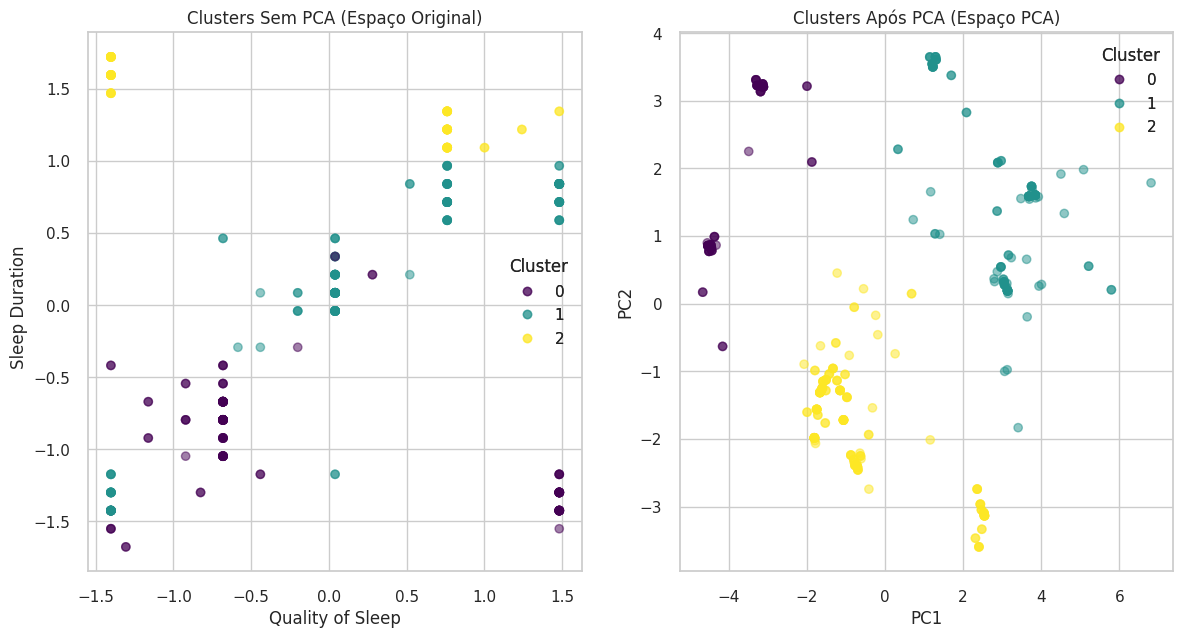

In [ ]:
df_kmeans_encoded = pd.get_dummies(df_kmeans, drop_first=True)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_kmeans['Gender'] = label_encoder.fit_transform(df_kmeans['Gender'])
df_kmeans['Occupation'] = label_encoder.fit_transform(df_kmeans['Occupation'])
df_kmeans['BMI Category'] = label_encoder.fit_transform(df_kmeans['BMI Category'])
df_kmeans['Blood Pressure'] = label_encoder.fit_transform(df_kmeans['Blood Pressure'])
df_kmeans['Sleep Disorder '] = label_encoder.fit_transform(df_kmeans['Sleep Disorder'])

# Separar características e rótulos
X = df_kmeans_encoded.drop(columns=['Quality of Sleep']).values  # Todas as colunas exceto a coluna 'Quality of Sleep'
y = df_kmeans_encoded['Quality of Sleep'].values

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means diretamente nos dados padronizados (sem PCA)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_orig = kmeans.fit_predict(X_scaled)

# Aplicar PCA para reduzir a dimensionalidade para 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means após PCA
labels_pca = kmeans.fit_predict(X_pca)

# Adicionar a coluna de clusters aos dados originais
df_kmeans_encoded['Cluster'] = labels_pca

# Visualizar os resultados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plotar clusters sem PCA
scatter1 = ax1.scatter(X_scaled[:, 4], X_scaled[:, 3], c=labels_orig, cmap='viridis', alpha=0.5)
ax1.set_title('Clusters Sem PCA (Espaço Original)')
ax1.set_xlabel('Quality of Sleep')
ax1.set_ylabel('Sleep Duration  ')
hue = 'Cluster'
legend1 = ax1.legend(*scatter1.legend_elements(), title="Cluster")
ax1.add_artist(legend1)

# Plotar clusters após PCA
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.5)
ax2.set_title('Clusters Após PCA (Espaço PCA)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
legend2 = ax2.legend(*scatter2.legend_elements(), title="Cluster")
ax2.add_artist(legend2)

plt.show()

A técnica de PCA é uma técnica de redução de dimensionalidade que transforma um conjunto de dados com muitas variáveis em um conjunto com menos variáveis, chamadas de componentes principais, de modo a capturam a maior parte da variabilidade dos dados.

Apesar do PCA ser uma ferramenta poderosa para simplificar e entender dados de alta dimensão, reduzindo a complexidade e facilitando a visualização e análise, no caso em questão foi utilizado com fins de demonstração e comparação com clusters sem PCA.

A razão é que o PCA reduz a dimensionalidade dos dados projetando-os em um novo espaço de menor dimensão. Entretanto, essa redução pode levar à perda de informações importantes que não são capturadas pelos principais componentes.

Em contextos de saúde, a perda de informações pode significar que características críticas de um paciente ou condições de saúde não sejam bem representadas, potencialmente afetando a precisão dos diagnósticos.

Portanto, devido as características da técnica e do curto período para realizar análises complementares e obter uma visão mais completa e precisa dos dados, ou realizar validação cruzada com outras técnicas como o t-SNE ou UMAP, foi dada prioridade as análises puras do Kmeans, sem redução de dimensionalidade.

In [ ]:
# Adicionando PCA ao DataFrame
df_kmeans_encoded['PC1'] = X_pca[:, 0]
df_kmeans_encoded['PC2'] = X_pca[:, 1]

# Verificação se as colunas foram adicionadas corretamente
print(df_kmeans_encoded.head())

   Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       1   27           9             6.1                 6   
1       1   28           1             6.2                 6   
2       1   28           1             6.2                 6   
3       1   28           6             5.9                 4   
4       1   28           6             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             2              11   
1                       60             8             0               9   
2                       60             8             0               9   
3                       30             8             1              22   
4                       30             8             1              22   

   Heart Rate  ...  Stress Level std  Original_Count  Count  Sleep Disorder   \
0          77  ...          0.347021               4     25                1   
1         

In [ ]:
# Calculos estatísticos descritivos por cluster
cluster_stats = df_kmeans_encoded.groupby('Cluster')[['PC1', 'PC2']].agg(['mean', 'median', 'std', 'count'])
print(cluster_stats)

              PC1                                 PC2                      \
             mean    median       std count      mean    median       std   
Cluster                                                                     
0       -3.754048 -3.487435  0.765189    71  1.947020  2.094368  1.258228   
1        2.909043  3.063272  1.196350   125  1.508787  1.586967  1.273944   
2       -0.545466 -1.061947  1.499257   178 -1.836162 -1.720181  0.846516   

               
        count  
Cluster        
0          71  
1         125  
2         178  


O Cluster 0 tem valores positivos relativamente altos em ambos os componentes principais, com PC1 mostrando maior variabilidade (desvio padrão). A média e mediana para PC2 são também positivas, indicando que a maioria dos dados desse cluster está concentrada em valores mais altos nas duas dimensões principais.

O Cluster 1 tem valores negativos em PC1, com uma média e mediana bastante baixos. PC2 tem valores positivos, mas a variabilidade é um pouco maior em comparação com o Cluster 0. Isso indica que este cluster está mais disperso ao longo da dimensão PC2 e concentrado em valores baixos de PC1.

O Cluster 2 tem valores negativos tanto em PC1 quanto em PC2, com uma média e mediana mais baixas nos dois componentes. A variabilidade de PC1 é maior do que a de PC2, o que indica que a distribuição dos dados neste cluster é mais espalhada em torno de valores negativos para PC1 e mais concentrada ao longo da dimensão PC2.